## Logistic Regression for Sentiment Analysis

Adapted from http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/machine_learning/scikit-learn/outofcore_modelpersistence.ipynb

<br>
<br>

## The IMDb Movie Review Dataset

In this section, we will train a simple logistic regression model to classify movie reviews from the 50k IMDb review dataset that has been collected by Maas et. al.

> AL Maas, RE Daly, PT Pham, D Huang, AY Ng, and C Potts. Learning word vectors for sentiment analysis. In Proceedings of the 49th Annual Meeting of the Association for Computational Lin- guistics: Human Language Technologies, pages 142–150, Portland, Oregon, USA, June 2011. Association for Computational Linguistics

[Source: http://ai.stanford.edu/~amaas/data/sentiment/]

The dataset consists of 50,000 movie reviews from the original "train" and "test" subdirectories. The class labels are binary (1=positive and 0=negative) and contain 25,000 positive and 25,000 negative movie reviews, respectively.
For simplicity, I assembled the reviews in a single CSV file.


In [1]:
import pandas as pd
# if you want to download the original file:
#df = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/50k_imdb_movie_reviews.csv')
# otherwise load local file
df = pd.read_csv('shuffled_movie_data.csv')
df.tail()

,review,sentiment
49995,"OK, lets start with the best. the building. al...",0
49996,The British 'heritage film' industry is out of...,0
49997,I don't even know where to begin on this one. ...,0
49998,Richard Tyler is a little boy who is scared of...,0
49999,I waited long to watch this movie. Also becaus...,1


Let us shuffle the class labels.

In [2]:
import numpy as np
## uncomment these lines if you have dowloaded the original file:
#np.random.seed(0)
#df = df.reindex(np.random.permutation(df.index))
#df[['review', 'sentiment']].to_csv('shuffled_movie_data.csv', index=False)

<br>
<br>

## Preprocessing Text Data

Now, let us define a simple `tokenizer` that splits the text into individual word tokens. Furthermore, we will use some simple regular expression to remove HTML markup and all non-letter characters but "emoticons," convert the text to lower case, remove stopwords, and apply the Porter stemming algorithm to convert the words into their root form.

In [3]:
import numpy as np
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords

stop = stopwords.words('english')
porter = PorterStemmer()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    text = [w for w in text.split() if w not in stop]
    tokenized = [porter.stem(w) for w in text]
    return text

Let's give it at try:

In [4]:
tokenizer('This :) is a <a> test! :-)</br>')

['test', ':)', ':)']

## Learning (SciKit)

First, we define a generator that returns the document body and the corresponding class label:

In [5]:
def stream_docs(path):
    with open(path, 'r') as csv:
        next(csv) # skip header
        for line in csv:
            text, label = line[:-3], int(line[-2])
            yield text, label

To conform that the `stream_docs` function fetches the documents as intended, let us execute the following code snippet before we implement the `get_minibatch` function:

In [6]:
next(stream_docs(path='shuffled_movie_data.csv'))

('"In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />""Murder in Greenwich"" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich f

After we confirmed that our `stream_docs` functions works, we will now implement a `get_minibatch` function to fetch a specified number (`size`) of documents:

In [7]:
def get_minibatch(doc_stream, size):
    docs, y = [], []
    for _ in range(size):
        text, label = next(doc_stream)
        docs.append(text)
        y.append(label)
    return docs, y

Next, we will make use of the "hashing trick" through scikit-learns [HashingVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html) to create a bag-of-words model of our documents. Details of the bag-of-words model for document classification can be found at  [Naive Bayes and Text Classification I - Introduction and Theory](http://arxiv.org/abs/1410.5329).

In [8]:
from sklearn.feature_extraction.text import HashingVectorizer
vect = HashingVectorizer(decode_error='ignore', 
                         n_features=2**21,
                         preprocessor=None, 
                         tokenizer=tokenizer)

# Exercise 1: define features based on word embeddings (pre-trained word2vec / Glove/Fastext emebddings can be used)
# Define suitable d dimension, and sequence length

Using the [SGDClassifier]() from scikit-learn, we will can instanciate a logistic regression classifier that learns from the documents incrementally using stochastic gradient descent. 

In [9]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', random_state=1, n_iter=1)
doc_stream = stream_docs(path='shuffled_movie_data.csv')
# Exercise 2: Define at least a Three layer neural network. Define its structure (number of hidden neurons, etc)
# Define a nonlinear function for hidden layers.
# Define a suitable loss function for binary classification
# Implement the backpropagation algorithm for this structure
# Do not use Keras / Tensorflow /PyTorch etc. libraries
# Train the model using SGD

In [10]:
#import pyprind
#pbar = pyprind.ProgBar(45)

classes = np.array([0, 1])
for _ in range(45):
    X_train, y_train = get_minibatch(doc_stream, size=1000)
    X_train = vect.transform(X_train)
#     print(y_train.shape)
    clf.partial_fit(X_train, y_train, classes=classes)
    #pbar.update()

/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages

/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages

Depending on your machine, it will take about 2-3 minutes to stream the documents and learn the weights for the logistic regression model to classify "new" movie reviews. Executing the preceding code, we used the first 45,000 movie reviews to train the classifier, which means that we have 5,000 reviews left for testing:

In [11]:
X_test, y_test = get_minibatch(doc_stream, size=5000)
X_test = vect.transform(X_test)
print('Accuracy: %.3f' % clf.score(X_test, y_test))
#Exercise 3: compare  with your Neural Network

Accuracy: 0.867


I think that the predictive performance, an accuracy of ~87%, is quite "reasonable" given that we "only" used the default parameters and didn't do any hyperparameter optimization. 

After we estimated the model perfomance, let us use those last 5,000 test samples to update our model.

In [12]:
clf = clf.partial_fit(X_test, y_test)

/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


<br>
<br>

# Model Persistence

In the previous section, we successfully trained a model to predict the sentiment of a movie review. Unfortunately, if we'd close this IPython notebook at this point, we'd have to go through the whole learning process again and again if we'd want to make a prediction on "new data."

So, to reuse this model, we could use the [`pickle`](https://docs.python.org/3.5/library/pickle.html) module to "serialize a Python object structure". Or even better, we could use the [`joblib`](https://pypi.python.org/pypi/joblib) library, which handles large NumPy arrays more efficiently.

To install:
conda install -c anaconda joblib

In [13]:
import joblib
import os
if not os.path.exists('./pkl_objects'):
    os.mkdir('./pkl_objects')
    
joblib.dump(vect, './vectorizer.pkl')
joblib.dump(clf, './clf.pkl')

['./clf.pkl']

Using the code above, we "pickled" the `HashingVectorizer` and the `SGDClassifier` so that we can re-use those objects later. However, `pickle` and `joblib` have a known issue with `pickling` objects or functions from a `__main__` block and we'd get an `AttributeError: Can't get attribute [x] on <module '__main__'>` if we'd unpickle it later. Thus, to pickle the `tokenizer` function, we can write it to a file and import it to get the `namespace` "right".

In [14]:
%%writefile tokenizer.py
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords

stop = stopwords.words('english')
porter = PorterStemmer()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    text = [w for w in text.split() if w not in stop]
    tokenized = [porter.stem(w) for w in text]
    return text

Overwriting tokenizer.py


In [15]:
from tokenizer import tokenizer
joblib.dump(tokenizer, './tokenizer.pkl')

['./tokenizer.pkl']

Now, let us restart this IPython notebook and check if the we can load our serialized objects:

In [16]:
import joblib
tokenizer = joblib.load('./tokenizer.pkl')
vect = joblib.load('./vectorizer.pkl')
clf = joblib.load('./clf.pkl')

After loading the `tokenizer`, `HashingVectorizer`, and the tranined logistic regression model, we can use it to make predictions on new data, which can be useful, for example, if we'd want to embed our classifier into a web application -- a topic for another IPython notebook.

In [17]:
example = ['I did not like this movie']
X = vect.transform(example)
clf.predict(X)

array([0])

In [18]:
example = ['I loved this movie']
X = vect.transform(example)
clf.predict(X)

array([1])

# Solucion de Tareas

## Tarea 1: WordEmbeddings

## Cargando dataset

In [19]:
#RAW DATA
doc_stream = stream_docs(path='shuffled_movie_data.csv')
TOTAL_EXAMPLES = 50000

X_full , y_full = get_minibatch(doc_stream, size=TOTAL_EXAMPLES)

## Definiendo nuevas caracteristicas usando Word Embeddings

In [20]:
#configuracion
MAX_NB_WORDS = 1000
MAX_SEQUENCE_LENGTH = 1000
N_FEATURES = 50 #dimension


In [21]:
#Carga de word Embedings preentrenados
glove_file = 'pretrained/glove.twitter.27B.' + str(N_FEATURES) + 'd.txt'
emb_dict = {}
glove = open(glove_file)
for line in glove:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], dtype='float32')
    emb_dict[word] = vector
glove.close()

In [22]:

#Creacion del vocabulario del dataset

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#MAX_NB_WORDS = 1000
#MAX_SEQUENCE_LENGTH = 1000
#N_FEATURES = 500 #dimensiones

tokenizer_k = Tokenizer(nb_words=MAX_NB_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,split=" ")
tokenizer_k.fit_on_texts(X_full)
sequences = tokenizer_k.texts_to_sequences(X_full)
word_index = tokenizer_k.word_index #vocabulario del dataset
N_WORDS = len(word_index) #numero de palabras unicas en el dataset
print('%s palabras unicas.' %N_WORDS)

Using TensorFlow backend.
/home/david/entorno1/lib/python3.6/site-packages/keras_preprocessing/text.py:177: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


124252 palabras unicas.


## Vectorizacion del Dataset

In [23]:
# Funcion que convierte un documento en un vector promediando vectores "wordEmbeddings" 
# en un documento
def document2Vector(vocabulario_emb,n_features,documento):
    # n_features: dimension del vector
    # documentos: documento (string)
    vector = np.zeros((1,n_features),dtype="float64")
    words = tokenizer(documento)
    nwords = 0
    for word in words:
        #print(word)
        word_emb = vocabulario_emb.get(word)
        if word_emb is not None:
            vector = vector+word_emb
            nwords = nwords + 1.
    if nwords > 0:
        vector = vector/nwords
    vector = vector.reshape((1,n_features))
    
    return vector

In [24]:
#funcion que transforma documentos(corpus) a vectores numericos usando word embeddings.
def corpus2Matrix(corpus,n_examples, n_features):
    matrix = np.zeros((n_examples, n_features))
    for i in range(n_examples):
        vector = document2Vector(emb_dict,n_features,corpus[i])
        matrix[i,:]=vector
    return matrix

In [25]:
#DEFINICION DE NUEVAS CARACTERISTICAS: Llamado de las funciones antes definidas.
#Este proceso puede demorar, por lo que solo se ejecuto una vez y se guardo la matriz en
#un csv, si desea ejecutar descomente las siguientes 2 lineas
#mm=corpus2Matrix(X_full,TOTAL_EXAMPLES, N_FEATURES)
#np.savetxt('matrix_embeding.csv', mm)

In [26]:
# Carga de datos
X=np.loadtxt('matrix_embeding.csv')

In [27]:
X[4999,:]*1000

array([ 2.32962105e+02,  2.10725443e+02,  1.55017363e+01,  8.40763092e+01,
        7.92159411e+01,  2.86586536e+02,  9.04910358e+02, -2.36633981e+02,
       -1.82299615e+02,  1.61963325e+02, -4.05243644e+01, -1.24028262e+02,
       -3.84192170e+03, -2.06049839e+01, -2.16941698e+02,  2.11767037e+01,
        2.13507740e+02, -1.96449158e+02, -1.55626545e+02, -8.81555390e+01,
        7.58261087e+01, -3.86509834e+01, -7.65415855e+01,  1.90189775e+02,
       -1.42897729e+02,  6.17523400e+02, -1.26982207e+02,  8.89971795e+01,
       -1.81705949e+02, -1.76245184e+02, -7.33593443e-01, -9.08780513e+01,
       -5.60791226e+01,  3.49233080e+01,  2.46382283e+02,  9.17318119e+01,
       -1.31053947e+02, -1.84546897e+02,  2.04173912e+02, -1.01386669e+02,
       -3.25451896e+02,  2.00178957e+02,  2.67673428e+02, -3.65778283e+01,
        9.00153811e+01, -1.20048910e+02,  2.05044827e+02,  2.73416869e+02,
       -2.22464404e+02,  1.64775535e+01])

# Tarea 2: Implementacion de Red Neuronal

## Division de datos de entrenamiento y test

In [28]:
from sklearn.model_selection import train_test_split

m_train = 45000 #numero de ejemplos de entrenamiento
m_test = 5000 #numero de ejemplos de prueba
y_full = np.array(y_full)
y_full = y_full.reshape(TOTAL_EXAMPLES,1)
X_train, X_test, y_train, y_test = train_test_split(X, y_full, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)



In [29]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha=0.001,loss='log', random_state=1, n_iter=15)
clf.fit(X_train, y_train)

/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=15, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=1, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
print('Accuracy: %.3f' % clf.score(X_test, y_test))

Accuracy: 0.765


In [31]:
X_train = np.transpose(X_train)
y_train = np.transpose(y_train)
X_test = np.transpose(X_test)
y_test = np.transpose(y_test)
X_val = np.transpose(X_val)
y_val = np.transpose(y_val)
print('ejemplos entrenamiento: ',X_train.shape)
print('ejemplos entrenamiento (labels): ',y_train.shape)
print('ejemplos validacion: ',X_val.shape)
print('ejemplos validacion (labels): ',y_val.shape)
print('ejemplos test: ',X_test.shape)
print('ejemplos test (labels): ',y_test.shape)

ejemplos entrenamiento:  (50, 36000)
ejemplos entrenamiento (labels):  (1, 36000)
ejemplos validacion:  (50, 9000)
ejemplos validacion (labels):  (1, 9000)
ejemplos test:  (50, 5000)
ejemplos test (labels):  (1, 5000)


## Definicion de la Arquitectura de la Red Neuronal

In [32]:
# Funcion que define la arquitectura de la red neuronal
def layer_sizes(X, Y, n_h):
    """
    X -- ejemplos de entrenamiento
    Y -- etiquetas de X
    
    Returns:
    n_x -- numero de neuronas en la capa de entrada
    n_h -- numero de neuronas de la capa oculta
    n_y -- numero de neuronas de la capa de salida
    """
    n_x = X.shape[0] # input layer
    n_h = n_h
    n_y = Y.shape[0] # output layer
    
    return (n_x, n_h, n_y)

In [33]:
(n_x, n_h, n_y) = layer_sizes(X_train, y_train, 4)
print("Tamaño de capa de entrada: n_x = " + str(n_x))
print("Tamaño de capa  oculta: n_h = " + str(n_h))
print("Tamaño de capa de salida: n_y = " + str(n_y))

Tamaño de capa de entrada: n_x = 50
Tamaño de capa  oculta: n_h = 4
Tamaño de capa de salida: n_y = 1


## Inicializacion de parametros

In [34]:
def initialize_parameters(n_x, n_h, n_y):
    """
    n_x -- Tamaño de capa de entrada
    n_h -- Tamaño de capa  oculta
    n_y -- Tamaño de capa de salida
    
    Returns:
    params -- diccionario con parametros
    """
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [35]:
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"].shape))
print("b1 = " + str(parameters["b1"].shape))
print("W2 = " + str(parameters["W2"].shape))
print("b2 = " + str(parameters["b2"].shape))

W1 = (4, 50)
b1 = (4, 1)
W2 = (1, 4)
b2 = (1, 1)


## Funciones de activacion

In [36]:
#definicion de funcion sigmoide
def sigmoid(z):
    s=1/(1+np.exp(-z))    
    return s

#Funcion tangente hyperbolica
def s_tanh(z):
    t = np.tanh(z)
    return t

## Forward Propagation

In [37]:
def s_forward_propagation(X, parameters):
    """
    X -- datos de entrenamiento(n_x, m)
    parameters -- diccionario con parametros inicializados
    
    Returns:
    A2 -- Activacion de la capa final (sigmoide)
    cache -- Diccionario con calculos intermedios "Z1", "A1", "Z2" y "A2"
    """
    # Parametros
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X)+b1
#     A1 = sigmoid(Z1)
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

## Funcion de costo

In [38]:
def s_compute_cost(a2, yi, parameters,lambd,m):
    """
    A2 -- Salida de activacion de la ultima capa (1, numero de ejemplos)
    Y -- etiquetas del conjunto de entrenamiento (1, numero de ejemplos)
    parameters -- diccionario con parametros W1, b1, W2 and b2
    
    Returns:
    cost -- funcion de costo (cross-entropy)
    """
    
    a2 = np.squeeze(a2)
    yi = np.squeeze(yi)
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    L2_regularizacion = (lambd/(2*m))*(np.sum(np.square(W2))+np.sum(np.square(W1)))
    
    logprobs = yi*np.log(a2) + (1-yi)*np.log(1-a2)
    cost = -logprobs + L2_regularizacion
    
    cost = np.squeeze(cost)
#     print('costo: ',cost)
    assert(isinstance(cost, float))
    
    return cost

In [39]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = np.multiply(Y,np.log(A2))+np.multiply((1-Y),np.log(1-A2))
    cost = -(1/m)*np.sum(logprobs)
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [40]:
# Funcion que se encarga de actualizar los parametros despues de una epoca

def s_update_parameters(parameters, grads, learning_rate):
    """
    parameters -- parametros
    grads -- gradientes
    learning_rate -- coeficiente de aprendizaje
    
    Returns:
    parameters -- parametros actualizados
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Actualizacion
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## Backward Propagation

In [41]:
#Propagacion hacia atras (Estocastico)
# def s_backward_propagation(parameters, cache, X, Y,learning_rate):
    
#     m = X.shape[1]
#     n = X.shape[0]
    
#     # Activaciones de forward prop.
#     A1 = cache["A1"]
#     A2 = cache["A2"]
   
#     i = np.random.random_integers(0, m-1) #indice aleatorio
# #     print('i',i)
#     W1 = parameters["W1"]
#     W2 = parameters["W2"]
    
#     a1 = A1[:,i].reshape(A1[:,i].shape[0],1) #activacion de un ejemplo en la primera capa
#     a2 = A2[:,i].reshape(A2[:,i].shape[0],1) #activacion de un ejemplo en la ultima capa
# #     print('W1.shape',W1.shape)
# #     print('W2.shape',W2.shape)
# #     print('A1.shape',A1.shape)
# #     print('A2.shape',A2.shape)
# #     print('a1.shape',a1.shape)
# #     print('a2.shape',a2.shape)
    
    
#     xi = X[:,i].reshape(X[:,i].shape[0],1)#ejemplo aleatorio
#     yi = Y[:,i].reshape(Y[:,i].shape[0],1)#etiqueta
    
#     ##Calculo del costo para un unico ejemplo
#     costo = s_compute_cost(a2, yi, parameters)
    
#     ## Backward propagation: calculo de dW1, db1, dW2, db2. 
#     dZ2 = a2 - yi    
#     dW2 = dZ2*np.transpose(a1)
#     db2 = dZ2#1x1
#     gp = sigmoid(a1)*(1-sigmoid(a1))#derivada de sigmoide
# #     gp = 1-np.power(a1,2)#derivada de tanh
#     dZ1 = np.multiply(np.dot(np.transpose(W2),dZ2),gp)
#     dW1 = np.dot(dZ1,np.transpose(xi))
#     db1 = dZ1
    
    
# #     print('dZ2.shape',dZ2.shape)
# #     print('dW2.shape',dW2.shape)
# #     print('db2.shape',db2.shape)
# #     print('dZ1.shape',dZ1.shape)
# #     print('dW1.shape',dW1.shape)
# #     print('db1.shape',db1.shape)

#     grads = {"dW1": dW1,
#              "db1": db1,
#              "dW2": dW2,
#              "db2": db2}
    
#     return  costo, grads

In [42]:
def s_backward_propagation(parameters, cache, X, Y, i,lambd):
    
    m = X.shape[1]
    n = X.shape[0]
    
    # Activaciones de forward prop.
    A1 = cache["A1"]
    A2 = cache["A2"]
   
    #indice aleatorio
#     i = np.random.random_integers(0, m-1) 
#     print('i',i)
   
    
    grads = {"dW1": None,
             "db1": None,
             "dW2": None,
             "db2": None}
      
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    a1 = A1[:,i].reshape(A1[:,i].shape[0],1) #activacion de un ejemplo en la primera capa
    a2 = A2[:,i].reshape(A2[:,i].shape[0],1) #activacion de un ejemplo en la ultima capa

    xi = X[:,i].reshape(X[:,i].shape[0],1)#ejemplo aleatorio
    yi = Y[:,i].reshape(Y[:,i].shape[0],1)#etiqueta

        ##Calculo del costo para un unico ejemplo
    costo = s_compute_cost(a2, yi, parameters,lambd,m)
#         costo = compute_cost(A2, Y, parameters)
        
        ## Backward propagation: calculo de dW1, db1, dW2, db2. 
    dZ2 = a2 - yi    
    grads["dW2"] = dZ2*np.transpose(a1) + (lambd/m)*(W2)
    grads["db2"] = dZ2#1x1
#     gp = sigmoid(a1)*(1-sigmoid(a1))#derivada de sigmoide
    gp = 1-np.power(a1,2)#derivada de tanh
    dZ1 = np.multiply(np.dot(np.transpose(W2),dZ2),gp)
    grads["dW1"] = np.dot(dZ1,np.transpose(xi))+ (lambd/m)*(W1)
    grads["db1"] = dZ1
        ##update
    
#     grads = {"dW1": dW1,
#              "db1": db1,
#              "dW2": dW2,
#              "db2": db2}
    
    return  costo, grads

## Gradiente Descendente Estocastico

In [43]:
def nn_modelo(X, Y, n_h, num_iterations, print_cost,learning_rate,lambd):
    """
    Argumentos:
    X -- conjunto de entrenamiento
    Y -- etiquetas de entrenamiento
    n_h -- numero de neuronas en la capa oculta
    num_iterations -- Numero de epocas 
    print_cost -- imprimir costos
    
    Retorna:
    parameters -- parametros aprendidos.
    costos -- array historico de costos
    """
    
    n_x, n_h, n_y = layer_sizes(X, Y,n_h)
    print('(n_x, n_h, n_y):',n_x, n_h, n_y)
#     n_h = layer_sizes(X, Y)[1]
#     n_y = layer_sizes(X, Y)[2]
    
   ##Inicializacion de parametros
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    ph_W1 = []
    ph_b1 = []
    ph_W2 = []
    ph_b2 = []
    
    # Gradiente Descendente Estocatico
    costos = []
    m = X.shape[1]
        
    for j in range(0, num_iterations):
#         i = np.random.random_integers(0, m-1)
#         # Forward propagation.
#         A2, cache = s_forward_propagation(X, parameters)
#         print('iteracion: ',j)
#         # Backpropagation. 
#         costo, grads = s_backward_propagation(parameters, cache, X, Y,i)
#         costos.append(costo)
#          # Gradient descent parameter update. 
#         parameters = s_update_parameters(parameters, grads,learning_rate)
#         if(costo<0.01):
#             break
        for i in range(0,m):
            ph_W1.append(parameters["W1"])
            ph_b1.append(parameters["b1"])
            ph_W2.append(parameters["W2"])
            ph_b2.append(parameters["b2"])
            
            # Forward propagation.
            A2, cache = s_forward_propagation(X, parameters)
            print('iteracion: ',i)
            # Backpropagation. 
            costo, grads = s_backward_propagation(parameters, cache, X, Y,i,lambd)
            costos.append(costo)
            # Gradient descent parameter update. 
            
            parameters = s_update_parameters(parameters, grads,learning_rate)
            if(costo<0.01):
                break
    
   
    parameters_h = {"hW1": ph_W1,
             "hb1": ph_b1,
             "hW2": ph_W2,
             "hb2": ph_b2}
    
    parameters = calculate_mean_parameters(parameters,parameters_h)
    
   
    return costos,parameters

In [44]:
def calculate_mean_parameters(parameters, parameters_history):
    ph_W1 = parameters_history["hW1"]
    ph_b1 = parameters_history["hb1"]
    ph_W2 = parameters_history["hW2"]
    ph_b2 = parameters_history["hb2"]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    length = len(ph_W1)
    for k in range(0,length-1):
        W1 = W1 + ph_W1[k]
        b1 = b1 + ph_b1[k]
        W2 = W2 + ph_W2[k]
        b2 = b2 + ph_b2[k]
        
    W1 = (1/length)*W1
    b1 = (1/length)*b1
    W2 = (1/length)*W2
    b2 = (1/length)*b2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [45]:
## Funcion que realiza predicciones
## Threshold = 0.5
def s_predict(parameters, X):
    A2, cache = s_forward_propagation(X,parameters)
    predictions = (A2 > 0.5).astype(int)
    
    return predictions

In [46]:
##Funcion para graficar la convergencia de un algoritmo
import matplotlib.pyplot as plt
def plotConvergence(jvec,iterations):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergencia Stochastic Gradient Descendt")
    plt.xlabel("Numero de Iteraciones")
    plt.ylabel("Funcion de Costo")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
#     dummy = plt.xlim([-0.05*iterations,10.0*iterations])

## Entrenamiento

In [47]:
costos, parameters = nn_modelo(X_train, y_train, 4, num_iterations=1, 
                               print_cost=True,learning_rate=0.01, lambd = 0.7)


(n_x, n_h, n_y): 50 4 1
iteracion:  0
iteracion:  1
iteracion:  2
iteracion:  3
iteracion:  4
iteracion:  5
iteracion:  6
iteracion:  7
iteracion:  8
iteracion:  9
iteracion:  10
iteracion:  11
iteracion:  12
iteracion:  13
iteracion:  14
iteracion:  15
iteracion:  16
iteracion:  17
iteracion:  18
iteracion:  19
iteracion:  20
iteracion:  21
iteracion:  22
iteracion:  23
iteracion:  24
iteracion:  25
iteracion:  26
iteracion:  27
iteracion:  28
iteracion:  29
iteracion:  30
iteracion:  31
iteracion:  32
iteracion:  33
iteracion:  34
iteracion:  35
iteracion:  36
iteracion:  37
iteracion:  38
iteracion:  39
iteracion:  40
iteracion:  41
iteracion:  42
iteracion:  43
iteracion:  44
iteracion:  45
iteracion:  46
iteracion:  47
iteracion:  48
iteracion:  49
iteracion:  50
iteracion:  51
iteracion:  52
iteracion:  53
iteracion:  54
iteracion:  55
iteracion:  56
iteracion:  57
iteracion:  58
iteracion:  59
iteracion:  60
iteracion:  61
iteracion:  62
iteracion:  63
iteracion:  64
iteracion: 

iteracion:  533
iteracion:  534
iteracion:  535
iteracion:  536
iteracion:  537
iteracion:  538
iteracion:  539
iteracion:  540
iteracion:  541
iteracion:  542
iteracion:  543
iteracion:  544
iteracion:  545
iteracion:  546
iteracion:  547
iteracion:  548
iteracion:  549
iteracion:  550
iteracion:  551
iteracion:  552
iteracion:  553
iteracion:  554
iteracion:  555
iteracion:  556
iteracion:  557
iteracion:  558
iteracion:  559
iteracion:  560
iteracion:  561
iteracion:  562
iteracion:  563
iteracion:  564
iteracion:  565
iteracion:  566
iteracion:  567
iteracion:  568
iteracion:  569
iteracion:  570
iteracion:  571
iteracion:  572
iteracion:  573
iteracion:  574
iteracion:  575
iteracion:  576
iteracion:  577
iteracion:  578
iteracion:  579
iteracion:  580
iteracion:  581
iteracion:  582
iteracion:  583
iteracion:  584
iteracion:  585
iteracion:  586
iteracion:  587
iteracion:  588
iteracion:  589
iteracion:  590
iteracion:  591
iteracion:  592
iteracion:  593
iteracion:  594
iteracio

iteracion:  1059
iteracion:  1060
iteracion:  1061
iteracion:  1062
iteracion:  1063
iteracion:  1064
iteracion:  1065
iteracion:  1066
iteracion:  1067
iteracion:  1068
iteracion:  1069
iteracion:  1070
iteracion:  1071
iteracion:  1072
iteracion:  1073
iteracion:  1074
iteracion:  1075
iteracion:  1076
iteracion:  1077
iteracion:  1078
iteracion:  1079
iteracion:  1080
iteracion:  1081
iteracion:  1082
iteracion:  1083
iteracion:  1084
iteracion:  1085
iteracion:  1086
iteracion:  1087
iteracion:  1088
iteracion:  1089
iteracion:  1090
iteracion:  1091
iteracion:  1092
iteracion:  1093
iteracion:  1094
iteracion:  1095
iteracion:  1096
iteracion:  1097
iteracion:  1098
iteracion:  1099
iteracion:  1100
iteracion:  1101
iteracion:  1102
iteracion:  1103
iteracion:  1104
iteracion:  1105
iteracion:  1106
iteracion:  1107
iteracion:  1108
iteracion:  1109
iteracion:  1110
iteracion:  1111
iteracion:  1112
iteracion:  1113
iteracion:  1114
iteracion:  1115
iteracion:  1116
iteracion:  11

iteracion:  1542
iteracion:  1543
iteracion:  1544
iteracion:  1545
iteracion:  1546
iteracion:  1547
iteracion:  1548
iteracion:  1549
iteracion:  1550
iteracion:  1551
iteracion:  1552
iteracion:  1553
iteracion:  1554
iteracion:  1555
iteracion:  1556
iteracion:  1557
iteracion:  1558
iteracion:  1559
iteracion:  1560
iteracion:  1561
iteracion:  1562
iteracion:  1563
iteracion:  1564
iteracion:  1565
iteracion:  1566
iteracion:  1567
iteracion:  1568
iteracion:  1569
iteracion:  1570
iteracion:  1571
iteracion:  1572
iteracion:  1573
iteracion:  1574
iteracion:  1575
iteracion:  1576
iteracion:  1577
iteracion:  1578
iteracion:  1579
iteracion:  1580
iteracion:  1581
iteracion:  1582
iteracion:  1583
iteracion:  1584
iteracion:  1585
iteracion:  1586
iteracion:  1587
iteracion:  1588
iteracion:  1589
iteracion:  1590
iteracion:  1591
iteracion:  1592
iteracion:  1593
iteracion:  1594
iteracion:  1595
iteracion:  1596
iteracion:  1597
iteracion:  1598
iteracion:  1599
iteracion:  16

iteracion:  2046
iteracion:  2047
iteracion:  2048
iteracion:  2049
iteracion:  2050
iteracion:  2051
iteracion:  2052
iteracion:  2053
iteracion:  2054
iteracion:  2055
iteracion:  2056
iteracion:  2057
iteracion:  2058
iteracion:  2059
iteracion:  2060
iteracion:  2061
iteracion:  2062
iteracion:  2063
iteracion:  2064
iteracion:  2065
iteracion:  2066
iteracion:  2067
iteracion:  2068
iteracion:  2069
iteracion:  2070
iteracion:  2071
iteracion:  2072
iteracion:  2073
iteracion:  2074
iteracion:  2075
iteracion:  2076
iteracion:  2077
iteracion:  2078
iteracion:  2079
iteracion:  2080
iteracion:  2081
iteracion:  2082
iteracion:  2083
iteracion:  2084
iteracion:  2085
iteracion:  2086
iteracion:  2087
iteracion:  2088
iteracion:  2089
iteracion:  2090
iteracion:  2091
iteracion:  2092
iteracion:  2093
iteracion:  2094
iteracion:  2095
iteracion:  2096
iteracion:  2097
iteracion:  2098
iteracion:  2099
iteracion:  2100
iteracion:  2101
iteracion:  2102
iteracion:  2103
iteracion:  21

iteracion:  2549
iteracion:  2550
iteracion:  2551
iteracion:  2552
iteracion:  2553
iteracion:  2554
iteracion:  2555
iteracion:  2556
iteracion:  2557
iteracion:  2558
iteracion:  2559
iteracion:  2560
iteracion:  2561
iteracion:  2562
iteracion:  2563
iteracion:  2564
iteracion:  2565
iteracion:  2566
iteracion:  2567
iteracion:  2568
iteracion:  2569
iteracion:  2570
iteracion:  2571
iteracion:  2572
iteracion:  2573
iteracion:  2574
iteracion:  2575
iteracion:  2576
iteracion:  2577
iteracion:  2578
iteracion:  2579
iteracion:  2580
iteracion:  2581
iteracion:  2582
iteracion:  2583
iteracion:  2584
iteracion:  2585
iteracion:  2586
iteracion:  2587
iteracion:  2588
iteracion:  2589
iteracion:  2590
iteracion:  2591
iteracion:  2592
iteracion:  2593
iteracion:  2594
iteracion:  2595
iteracion:  2596
iteracion:  2597
iteracion:  2598
iteracion:  2599
iteracion:  2600
iteracion:  2601
iteracion:  2602
iteracion:  2603
iteracion:  2604
iteracion:  2605
iteracion:  2606
iteracion:  26

iteracion:  3045
iteracion:  3046
iteracion:  3047
iteracion:  3048
iteracion:  3049
iteracion:  3050
iteracion:  3051
iteracion:  3052
iteracion:  3053
iteracion:  3054
iteracion:  3055
iteracion:  3056
iteracion:  3057
iteracion:  3058
iteracion:  3059
iteracion:  3060
iteracion:  3061
iteracion:  3062
iteracion:  3063
iteracion:  3064
iteracion:  3065
iteracion:  3066
iteracion:  3067
iteracion:  3068
iteracion:  3069
iteracion:  3070
iteracion:  3071
iteracion:  3072
iteracion:  3073
iteracion:  3074
iteracion:  3075
iteracion:  3076
iteracion:  3077
iteracion:  3078
iteracion:  3079
iteracion:  3080
iteracion:  3081
iteracion:  3082
iteracion:  3083
iteracion:  3084
iteracion:  3085
iteracion:  3086
iteracion:  3087
iteracion:  3088
iteracion:  3089
iteracion:  3090
iteracion:  3091
iteracion:  3092
iteracion:  3093
iteracion:  3094
iteracion:  3095
iteracion:  3096
iteracion:  3097
iteracion:  3098
iteracion:  3099
iteracion:  3100
iteracion:  3101
iteracion:  3102
iteracion:  31

iteracion:  3546
iteracion:  3547
iteracion:  3548
iteracion:  3549
iteracion:  3550
iteracion:  3551
iteracion:  3552
iteracion:  3553
iteracion:  3554
iteracion:  3555
iteracion:  3556
iteracion:  3557
iteracion:  3558
iteracion:  3559
iteracion:  3560
iteracion:  3561
iteracion:  3562
iteracion:  3563
iteracion:  3564
iteracion:  3565
iteracion:  3566
iteracion:  3567
iteracion:  3568
iteracion:  3569
iteracion:  3570
iteracion:  3571
iteracion:  3572
iteracion:  3573
iteracion:  3574
iteracion:  3575
iteracion:  3576
iteracion:  3577
iteracion:  3578
iteracion:  3579
iteracion:  3580
iteracion:  3581
iteracion:  3582
iteracion:  3583
iteracion:  3584
iteracion:  3585
iteracion:  3586
iteracion:  3587
iteracion:  3588
iteracion:  3589
iteracion:  3590
iteracion:  3591
iteracion:  3592
iteracion:  3593
iteracion:  3594
iteracion:  3595
iteracion:  3596
iteracion:  3597
iteracion:  3598
iteracion:  3599
iteracion:  3600
iteracion:  3601
iteracion:  3602
iteracion:  3603
iteracion:  36

iteracion:  4043
iteracion:  4044
iteracion:  4045
iteracion:  4046
iteracion:  4047
iteracion:  4048
iteracion:  4049
iteracion:  4050
iteracion:  4051
iteracion:  4052
iteracion:  4053
iteracion:  4054
iteracion:  4055
iteracion:  4056
iteracion:  4057
iteracion:  4058
iteracion:  4059
iteracion:  4060
iteracion:  4061
iteracion:  4062
iteracion:  4063
iteracion:  4064
iteracion:  4065
iteracion:  4066
iteracion:  4067
iteracion:  4068
iteracion:  4069
iteracion:  4070
iteracion:  4071
iteracion:  4072
iteracion:  4073
iteracion:  4074
iteracion:  4075
iteracion:  4076
iteracion:  4077
iteracion:  4078
iteracion:  4079
iteracion:  4080
iteracion:  4081
iteracion:  4082
iteracion:  4083
iteracion:  4084
iteracion:  4085
iteracion:  4086
iteracion:  4087
iteracion:  4088
iteracion:  4089
iteracion:  4090
iteracion:  4091
iteracion:  4092
iteracion:  4093
iteracion:  4094
iteracion:  4095
iteracion:  4096
iteracion:  4097
iteracion:  4098
iteracion:  4099
iteracion:  4100
iteracion:  41

iteracion:  4535
iteracion:  4536
iteracion:  4537
iteracion:  4538
iteracion:  4539
iteracion:  4540
iteracion:  4541
iteracion:  4542
iteracion:  4543
iteracion:  4544
iteracion:  4545
iteracion:  4546
iteracion:  4547
iteracion:  4548
iteracion:  4549
iteracion:  4550
iteracion:  4551
iteracion:  4552
iteracion:  4553
iteracion:  4554
iteracion:  4555
iteracion:  4556
iteracion:  4557
iteracion:  4558
iteracion:  4559
iteracion:  4560
iteracion:  4561
iteracion:  4562
iteracion:  4563
iteracion:  4564
iteracion:  4565
iteracion:  4566
iteracion:  4567
iteracion:  4568
iteracion:  4569
iteracion:  4570
iteracion:  4571
iteracion:  4572
iteracion:  4573
iteracion:  4574
iteracion:  4575
iteracion:  4576
iteracion:  4577
iteracion:  4578
iteracion:  4579
iteracion:  4580
iteracion:  4581
iteracion:  4582
iteracion:  4583
iteracion:  4584
iteracion:  4585
iteracion:  4586
iteracion:  4587
iteracion:  4588
iteracion:  4589
iteracion:  4590
iteracion:  4591
iteracion:  4592
iteracion:  45

iteracion:  5038
iteracion:  5039
iteracion:  5040
iteracion:  5041
iteracion:  5042
iteracion:  5043
iteracion:  5044
iteracion:  5045
iteracion:  5046
iteracion:  5047
iteracion:  5048
iteracion:  5049
iteracion:  5050
iteracion:  5051
iteracion:  5052
iteracion:  5053
iteracion:  5054
iteracion:  5055
iteracion:  5056
iteracion:  5057
iteracion:  5058
iteracion:  5059
iteracion:  5060
iteracion:  5061
iteracion:  5062
iteracion:  5063
iteracion:  5064
iteracion:  5065
iteracion:  5066
iteracion:  5067
iteracion:  5068
iteracion:  5069
iteracion:  5070
iteracion:  5071
iteracion:  5072
iteracion:  5073
iteracion:  5074
iteracion:  5075
iteracion:  5076
iteracion:  5077
iteracion:  5078
iteracion:  5079
iteracion:  5080
iteracion:  5081
iteracion:  5082
iteracion:  5083
iteracion:  5084
iteracion:  5085
iteracion:  5086
iteracion:  5087
iteracion:  5088
iteracion:  5089
iteracion:  5090
iteracion:  5091
iteracion:  5092
iteracion:  5093
iteracion:  5094
iteracion:  5095
iteracion:  50

iteracion:  5541
iteracion:  5542
iteracion:  5543
iteracion:  5544
iteracion:  5545
iteracion:  5546
iteracion:  5547
iteracion:  5548
iteracion:  5549
iteracion:  5550
iteracion:  5551
iteracion:  5552
iteracion:  5553
iteracion:  5554
iteracion:  5555
iteracion:  5556
iteracion:  5557
iteracion:  5558
iteracion:  5559
iteracion:  5560
iteracion:  5561
iteracion:  5562
iteracion:  5563
iteracion:  5564
iteracion:  5565
iteracion:  5566
iteracion:  5567
iteracion:  5568
iteracion:  5569
iteracion:  5570
iteracion:  5571
iteracion:  5572
iteracion:  5573
iteracion:  5574
iteracion:  5575
iteracion:  5576
iteracion:  5577
iteracion:  5578
iteracion:  5579
iteracion:  5580
iteracion:  5581
iteracion:  5582
iteracion:  5583
iteracion:  5584
iteracion:  5585
iteracion:  5586
iteracion:  5587
iteracion:  5588
iteracion:  5589
iteracion:  5590
iteracion:  5591
iteracion:  5592
iteracion:  5593
iteracion:  5594
iteracion:  5595
iteracion:  5596
iteracion:  5597
iteracion:  5598
iteracion:  55

iteracion:  6043
iteracion:  6044
iteracion:  6045
iteracion:  6046
iteracion:  6047
iteracion:  6048
iteracion:  6049
iteracion:  6050
iteracion:  6051
iteracion:  6052
iteracion:  6053
iteracion:  6054
iteracion:  6055
iteracion:  6056
iteracion:  6057
iteracion:  6058
iteracion:  6059
iteracion:  6060
iteracion:  6061
iteracion:  6062
iteracion:  6063
iteracion:  6064
iteracion:  6065
iteracion:  6066
iteracion:  6067
iteracion:  6068
iteracion:  6069
iteracion:  6070
iteracion:  6071
iteracion:  6072
iteracion:  6073
iteracion:  6074
iteracion:  6075
iteracion:  6076
iteracion:  6077
iteracion:  6078
iteracion:  6079
iteracion:  6080
iteracion:  6081
iteracion:  6082
iteracion:  6083
iteracion:  6084
iteracion:  6085
iteracion:  6086
iteracion:  6087
iteracion:  6088
iteracion:  6089
iteracion:  6090
iteracion:  6091
iteracion:  6092
iteracion:  6093
iteracion:  6094
iteracion:  6095
iteracion:  6096
iteracion:  6097
iteracion:  6098
iteracion:  6099
iteracion:  6100
iteracion:  61

iteracion:  6537
iteracion:  6538
iteracion:  6539
iteracion:  6540
iteracion:  6541
iteracion:  6542
iteracion:  6543
iteracion:  6544
iteracion:  6545
iteracion:  6546
iteracion:  6547
iteracion:  6548
iteracion:  6549
iteracion:  6550
iteracion:  6551
iteracion:  6552
iteracion:  6553
iteracion:  6554
iteracion:  6555
iteracion:  6556
iteracion:  6557
iteracion:  6558
iteracion:  6559
iteracion:  6560
iteracion:  6561
iteracion:  6562
iteracion:  6563
iteracion:  6564
iteracion:  6565
iteracion:  6566
iteracion:  6567
iteracion:  6568
iteracion:  6569
iteracion:  6570
iteracion:  6571
iteracion:  6572
iteracion:  6573
iteracion:  6574
iteracion:  6575
iteracion:  6576
iteracion:  6577
iteracion:  6578
iteracion:  6579
iteracion:  6580
iteracion:  6581
iteracion:  6582
iteracion:  6583
iteracion:  6584
iteracion:  6585
iteracion:  6586
iteracion:  6587
iteracion:  6588
iteracion:  6589
iteracion:  6590
iteracion:  6591
iteracion:  6592
iteracion:  6593
iteracion:  6594
iteracion:  65

iteracion:  7039
iteracion:  7040
iteracion:  7041
iteracion:  7042
iteracion:  7043
iteracion:  7044
iteracion:  7045
iteracion:  7046
iteracion:  7047
iteracion:  7048
iteracion:  7049
iteracion:  7050
iteracion:  7051
iteracion:  7052
iteracion:  7053
iteracion:  7054
iteracion:  7055
iteracion:  7056
iteracion:  7057
iteracion:  7058
iteracion:  7059
iteracion:  7060
iteracion:  7061
iteracion:  7062
iteracion:  7063
iteracion:  7064
iteracion:  7065
iteracion:  7066
iteracion:  7067
iteracion:  7068
iteracion:  7069
iteracion:  7070
iteracion:  7071
iteracion:  7072
iteracion:  7073
iteracion:  7074
iteracion:  7075
iteracion:  7076
iteracion:  7077
iteracion:  7078
iteracion:  7079
iteracion:  7080
iteracion:  7081
iteracion:  7082
iteracion:  7083
iteracion:  7084
iteracion:  7085
iteracion:  7086
iteracion:  7087
iteracion:  7088
iteracion:  7089
iteracion:  7090
iteracion:  7091
iteracion:  7092
iteracion:  7093
iteracion:  7094
iteracion:  7095
iteracion:  7096
iteracion:  70

iteracion:  7526
iteracion:  7527
iteracion:  7528
iteracion:  7529
iteracion:  7530
iteracion:  7531
iteracion:  7532
iteracion:  7533
iteracion:  7534
iteracion:  7535
iteracion:  7536
iteracion:  7537
iteracion:  7538
iteracion:  7539
iteracion:  7540
iteracion:  7541
iteracion:  7542
iteracion:  7543
iteracion:  7544
iteracion:  7545
iteracion:  7546
iteracion:  7547
iteracion:  7548
iteracion:  7549
iteracion:  7550
iteracion:  7551
iteracion:  7552
iteracion:  7553
iteracion:  7554
iteracion:  7555
iteracion:  7556
iteracion:  7557
iteracion:  7558
iteracion:  7559
iteracion:  7560
iteracion:  7561
iteracion:  7562
iteracion:  7563
iteracion:  7564
iteracion:  7565
iteracion:  7566
iteracion:  7567
iteracion:  7568
iteracion:  7569
iteracion:  7570
iteracion:  7571
iteracion:  7572
iteracion:  7573
iteracion:  7574
iteracion:  7575
iteracion:  7576
iteracion:  7577
iteracion:  7578
iteracion:  7579
iteracion:  7580
iteracion:  7581
iteracion:  7582
iteracion:  7583
iteracion:  75

iteracion:  8018
iteracion:  8019
iteracion:  8020
iteracion:  8021
iteracion:  8022
iteracion:  8023
iteracion:  8024
iteracion:  8025
iteracion:  8026
iteracion:  8027
iteracion:  8028
iteracion:  8029
iteracion:  8030
iteracion:  8031
iteracion:  8032
iteracion:  8033
iteracion:  8034
iteracion:  8035
iteracion:  8036
iteracion:  8037
iteracion:  8038
iteracion:  8039
iteracion:  8040
iteracion:  8041
iteracion:  8042
iteracion:  8043
iteracion:  8044
iteracion:  8045
iteracion:  8046
iteracion:  8047
iteracion:  8048
iteracion:  8049
iteracion:  8050
iteracion:  8051
iteracion:  8052
iteracion:  8053
iteracion:  8054
iteracion:  8055
iteracion:  8056
iteracion:  8057
iteracion:  8058
iteracion:  8059
iteracion:  8060
iteracion:  8061
iteracion:  8062
iteracion:  8063
iteracion:  8064
iteracion:  8065
iteracion:  8066
iteracion:  8067
iteracion:  8068
iteracion:  8069
iteracion:  8070
iteracion:  8071
iteracion:  8072
iteracion:  8073
iteracion:  8074
iteracion:  8075
iteracion:  80

iteracion:  8503
iteracion:  8504
iteracion:  8505
iteracion:  8506
iteracion:  8507
iteracion:  8508
iteracion:  8509
iteracion:  8510
iteracion:  8511
iteracion:  8512
iteracion:  8513
iteracion:  8514
iteracion:  8515
iteracion:  8516
iteracion:  8517
iteracion:  8518
iteracion:  8519
iteracion:  8520
iteracion:  8521
iteracion:  8522
iteracion:  8523
iteracion:  8524
iteracion:  8525
iteracion:  8526
iteracion:  8527
iteracion:  8528
iteracion:  8529
iteracion:  8530
iteracion:  8531
iteracion:  8532
iteracion:  8533
iteracion:  8534
iteracion:  8535
iteracion:  8536
iteracion:  8537
iteracion:  8538
iteracion:  8539
iteracion:  8540
iteracion:  8541
iteracion:  8542
iteracion:  8543
iteracion:  8544
iteracion:  8545
iteracion:  8546
iteracion:  8547
iteracion:  8548
iteracion:  8549
iteracion:  8550
iteracion:  8551
iteracion:  8552
iteracion:  8553
iteracion:  8554
iteracion:  8555
iteracion:  8556
iteracion:  8557
iteracion:  8558
iteracion:  8559
iteracion:  8560
iteracion:  85

iteracion:  8988
iteracion:  8989
iteracion:  8990
iteracion:  8991
iteracion:  8992
iteracion:  8993
iteracion:  8994
iteracion:  8995
iteracion:  8996
iteracion:  8997
iteracion:  8998
iteracion:  8999
iteracion:  9000
iteracion:  9001
iteracion:  9002
iteracion:  9003
iteracion:  9004
iteracion:  9005
iteracion:  9006
iteracion:  9007
iteracion:  9008
iteracion:  9009
iteracion:  9010
iteracion:  9011
iteracion:  9012
iteracion:  9013
iteracion:  9014
iteracion:  9015
iteracion:  9016
iteracion:  9017
iteracion:  9018
iteracion:  9019
iteracion:  9020
iteracion:  9021
iteracion:  9022
iteracion:  9023
iteracion:  9024
iteracion:  9025
iteracion:  9026
iteracion:  9027
iteracion:  9028
iteracion:  9029
iteracion:  9030
iteracion:  9031
iteracion:  9032
iteracion:  9033
iteracion:  9034
iteracion:  9035
iteracion:  9036
iteracion:  9037
iteracion:  9038
iteracion:  9039
iteracion:  9040
iteracion:  9041
iteracion:  9042
iteracion:  9043
iteracion:  9044
iteracion:  9045
iteracion:  90

iteracion:  9485
iteracion:  9486
iteracion:  9487
iteracion:  9488
iteracion:  9489
iteracion:  9490
iteracion:  9491
iteracion:  9492
iteracion:  9493
iteracion:  9494
iteracion:  9495
iteracion:  9496
iteracion:  9497
iteracion:  9498
iteracion:  9499
iteracion:  9500
iteracion:  9501
iteracion:  9502
iteracion:  9503
iteracion:  9504
iteracion:  9505
iteracion:  9506
iteracion:  9507
iteracion:  9508
iteracion:  9509
iteracion:  9510
iteracion:  9511
iteracion:  9512
iteracion:  9513
iteracion:  9514
iteracion:  9515
iteracion:  9516
iteracion:  9517
iteracion:  9518
iteracion:  9519
iteracion:  9520
iteracion:  9521
iteracion:  9522
iteracion:  9523
iteracion:  9524
iteracion:  9525
iteracion:  9526
iteracion:  9527
iteracion:  9528
iteracion:  9529
iteracion:  9530
iteracion:  9531
iteracion:  9532
iteracion:  9533
iteracion:  9534
iteracion:  9535
iteracion:  9536
iteracion:  9537
iteracion:  9538
iteracion:  9539
iteracion:  9540
iteracion:  9541
iteracion:  9542
iteracion:  95

iteracion:  9989
iteracion:  9990
iteracion:  9991
iteracion:  9992
iteracion:  9993
iteracion:  9994
iteracion:  9995
iteracion:  9996
iteracion:  9997
iteracion:  9998
iteracion:  9999
iteracion:  10000
iteracion:  10001
iteracion:  10002
iteracion:  10003
iteracion:  10004
iteracion:  10005
iteracion:  10006
iteracion:  10007
iteracion:  10008
iteracion:  10009
iteracion:  10010
iteracion:  10011
iteracion:  10012
iteracion:  10013
iteracion:  10014
iteracion:  10015
iteracion:  10016
iteracion:  10017
iteracion:  10018
iteracion:  10019
iteracion:  10020
iteracion:  10021
iteracion:  10022
iteracion:  10023
iteracion:  10024
iteracion:  10025
iteracion:  10026
iteracion:  10027
iteracion:  10028
iteracion:  10029
iteracion:  10030
iteracion:  10031
iteracion:  10032
iteracion:  10033
iteracion:  10034
iteracion:  10035
iteracion:  10036
iteracion:  10037
iteracion:  10038
iteracion:  10039
iteracion:  10040
iteracion:  10041
iteracion:  10042
iteracion:  10043
iteracion:  10044
ite

iteracion:  10448
iteracion:  10449
iteracion:  10450
iteracion:  10451
iteracion:  10452
iteracion:  10453
iteracion:  10454
iteracion:  10455
iteracion:  10456
iteracion:  10457
iteracion:  10458
iteracion:  10459
iteracion:  10460
iteracion:  10461
iteracion:  10462
iteracion:  10463
iteracion:  10464
iteracion:  10465
iteracion:  10466
iteracion:  10467
iteracion:  10468
iteracion:  10469
iteracion:  10470
iteracion:  10471
iteracion:  10472
iteracion:  10473
iteracion:  10474
iteracion:  10475
iteracion:  10476
iteracion:  10477
iteracion:  10478
iteracion:  10479
iteracion:  10480
iteracion:  10481
iteracion:  10482
iteracion:  10483
iteracion:  10484
iteracion:  10485
iteracion:  10486
iteracion:  10487
iteracion:  10488
iteracion:  10489
iteracion:  10490
iteracion:  10491
iteracion:  10492
iteracion:  10493
iteracion:  10494
iteracion:  10495
iteracion:  10496
iteracion:  10497
iteracion:  10498
iteracion:  10499
iteracion:  10500
iteracion:  10501
iteracion:  10502
iteracion:

iteracion:  10905
iteracion:  10906
iteracion:  10907
iteracion:  10908
iteracion:  10909
iteracion:  10910
iteracion:  10911
iteracion:  10912
iteracion:  10913
iteracion:  10914
iteracion:  10915
iteracion:  10916
iteracion:  10917
iteracion:  10918
iteracion:  10919
iteracion:  10920
iteracion:  10921
iteracion:  10922
iteracion:  10923
iteracion:  10924
iteracion:  10925
iteracion:  10926
iteracion:  10927
iteracion:  10928
iteracion:  10929
iteracion:  10930
iteracion:  10931
iteracion:  10932
iteracion:  10933
iteracion:  10934
iteracion:  10935
iteracion:  10936
iteracion:  10937
iteracion:  10938
iteracion:  10939
iteracion:  10940
iteracion:  10941
iteracion:  10942
iteracion:  10943
iteracion:  10944
iteracion:  10945
iteracion:  10946
iteracion:  10947
iteracion:  10948
iteracion:  10949
iteracion:  10950
iteracion:  10951
iteracion:  10952
iteracion:  10953
iteracion:  10954
iteracion:  10955
iteracion:  10956
iteracion:  10957
iteracion:  10958
iteracion:  10959
iteracion:

iteracion:  11366
iteracion:  11367
iteracion:  11368
iteracion:  11369
iteracion:  11370
iteracion:  11371
iteracion:  11372
iteracion:  11373
iteracion:  11374
iteracion:  11375
iteracion:  11376
iteracion:  11377
iteracion:  11378
iteracion:  11379
iteracion:  11380
iteracion:  11381
iteracion:  11382
iteracion:  11383
iteracion:  11384
iteracion:  11385
iteracion:  11386
iteracion:  11387
iteracion:  11388
iteracion:  11389
iteracion:  11390
iteracion:  11391
iteracion:  11392
iteracion:  11393
iteracion:  11394
iteracion:  11395
iteracion:  11396
iteracion:  11397
iteracion:  11398
iteracion:  11399
iteracion:  11400
iteracion:  11401
iteracion:  11402
iteracion:  11403
iteracion:  11404
iteracion:  11405
iteracion:  11406
iteracion:  11407
iteracion:  11408
iteracion:  11409
iteracion:  11410
iteracion:  11411
iteracion:  11412
iteracion:  11413
iteracion:  11414
iteracion:  11415
iteracion:  11416
iteracion:  11417
iteracion:  11418
iteracion:  11419
iteracion:  11420
iteracion:

iteracion:  11827
iteracion:  11828
iteracion:  11829
iteracion:  11830
iteracion:  11831
iteracion:  11832
iteracion:  11833
iteracion:  11834
iteracion:  11835
iteracion:  11836
iteracion:  11837
iteracion:  11838
iteracion:  11839
iteracion:  11840
iteracion:  11841
iteracion:  11842
iteracion:  11843
iteracion:  11844
iteracion:  11845
iteracion:  11846
iteracion:  11847
iteracion:  11848
iteracion:  11849
iteracion:  11850
iteracion:  11851
iteracion:  11852
iteracion:  11853
iteracion:  11854
iteracion:  11855
iteracion:  11856
iteracion:  11857
iteracion:  11858
iteracion:  11859
iteracion:  11860
iteracion:  11861
iteracion:  11862
iteracion:  11863
iteracion:  11864
iteracion:  11865
iteracion:  11866
iteracion:  11867
iteracion:  11868
iteracion:  11869
iteracion:  11870
iteracion:  11871
iteracion:  11872
iteracion:  11873
iteracion:  11874
iteracion:  11875
iteracion:  11876
iteracion:  11877
iteracion:  11878
iteracion:  11879
iteracion:  11880
iteracion:  11881
iteracion:

iteracion:  12294
iteracion:  12295
iteracion:  12296
iteracion:  12297
iteracion:  12298
iteracion:  12299
iteracion:  12300
iteracion:  12301
iteracion:  12302
iteracion:  12303
iteracion:  12304
iteracion:  12305
iteracion:  12306
iteracion:  12307
iteracion:  12308
iteracion:  12309
iteracion:  12310
iteracion:  12311
iteracion:  12312
iteracion:  12313
iteracion:  12314
iteracion:  12315
iteracion:  12316
iteracion:  12317
iteracion:  12318
iteracion:  12319
iteracion:  12320
iteracion:  12321
iteracion:  12322
iteracion:  12323
iteracion:  12324
iteracion:  12325
iteracion:  12326
iteracion:  12327
iteracion:  12328
iteracion:  12329
iteracion:  12330
iteracion:  12331
iteracion:  12332
iteracion:  12333
iteracion:  12334
iteracion:  12335
iteracion:  12336
iteracion:  12337
iteracion:  12338
iteracion:  12339
iteracion:  12340
iteracion:  12341
iteracion:  12342
iteracion:  12343
iteracion:  12344
iteracion:  12345
iteracion:  12346
iteracion:  12347
iteracion:  12348
iteracion:

iteracion:  12761
iteracion:  12762
iteracion:  12763
iteracion:  12764
iteracion:  12765
iteracion:  12766
iteracion:  12767
iteracion:  12768
iteracion:  12769
iteracion:  12770
iteracion:  12771
iteracion:  12772
iteracion:  12773
iteracion:  12774
iteracion:  12775
iteracion:  12776
iteracion:  12777
iteracion:  12778
iteracion:  12779
iteracion:  12780
iteracion:  12781
iteracion:  12782
iteracion:  12783
iteracion:  12784
iteracion:  12785
iteracion:  12786
iteracion:  12787
iteracion:  12788
iteracion:  12789
iteracion:  12790
iteracion:  12791
iteracion:  12792
iteracion:  12793
iteracion:  12794
iteracion:  12795
iteracion:  12796
iteracion:  12797
iteracion:  12798
iteracion:  12799
iteracion:  12800
iteracion:  12801
iteracion:  12802
iteracion:  12803
iteracion:  12804
iteracion:  12805
iteracion:  12806
iteracion:  12807
iteracion:  12808
iteracion:  12809
iteracion:  12810
iteracion:  12811
iteracion:  12812
iteracion:  12813
iteracion:  12814
iteracion:  12815
iteracion:

iteracion:  13226
iteracion:  13227
iteracion:  13228
iteracion:  13229
iteracion:  13230
iteracion:  13231
iteracion:  13232
iteracion:  13233
iteracion:  13234
iteracion:  13235
iteracion:  13236
iteracion:  13237
iteracion:  13238
iteracion:  13239
iteracion:  13240
iteracion:  13241
iteracion:  13242
iteracion:  13243
iteracion:  13244
iteracion:  13245
iteracion:  13246
iteracion:  13247
iteracion:  13248
iteracion:  13249
iteracion:  13250
iteracion:  13251
iteracion:  13252
iteracion:  13253
iteracion:  13254
iteracion:  13255
iteracion:  13256
iteracion:  13257
iteracion:  13258
iteracion:  13259
iteracion:  13260
iteracion:  13261
iteracion:  13262
iteracion:  13263
iteracion:  13264
iteracion:  13265
iteracion:  13266
iteracion:  13267
iteracion:  13268
iteracion:  13269
iteracion:  13270
iteracion:  13271
iteracion:  13272
iteracion:  13273
iteracion:  13274
iteracion:  13275
iteracion:  13276
iteracion:  13277
iteracion:  13278
iteracion:  13279
iteracion:  13280
iteracion:

iteracion:  13692
iteracion:  13693
iteracion:  13694
iteracion:  13695
iteracion:  13696
iteracion:  13697
iteracion:  13698
iteracion:  13699
iteracion:  13700
iteracion:  13701
iteracion:  13702
iteracion:  13703
iteracion:  13704
iteracion:  13705
iteracion:  13706
iteracion:  13707
iteracion:  13708
iteracion:  13709
iteracion:  13710
iteracion:  13711
iteracion:  13712
iteracion:  13713
iteracion:  13714
iteracion:  13715
iteracion:  13716
iteracion:  13717
iteracion:  13718
iteracion:  13719
iteracion:  13720
iteracion:  13721
iteracion:  13722
iteracion:  13723
iteracion:  13724
iteracion:  13725
iteracion:  13726
iteracion:  13727
iteracion:  13728
iteracion:  13729
iteracion:  13730
iteracion:  13731
iteracion:  13732
iteracion:  13733
iteracion:  13734
iteracion:  13735
iteracion:  13736
iteracion:  13737
iteracion:  13738
iteracion:  13739
iteracion:  13740
iteracion:  13741
iteracion:  13742
iteracion:  13743
iteracion:  13744
iteracion:  13745
iteracion:  13746
iteracion:

iteracion:  14160
iteracion:  14161
iteracion:  14162
iteracion:  14163
iteracion:  14164
iteracion:  14165
iteracion:  14166
iteracion:  14167
iteracion:  14168
iteracion:  14169
iteracion:  14170
iteracion:  14171
iteracion:  14172
iteracion:  14173
iteracion:  14174
iteracion:  14175
iteracion:  14176
iteracion:  14177
iteracion:  14178
iteracion:  14179
iteracion:  14180
iteracion:  14181
iteracion:  14182
iteracion:  14183
iteracion:  14184
iteracion:  14185
iteracion:  14186
iteracion:  14187
iteracion:  14188
iteracion:  14189
iteracion:  14190
iteracion:  14191
iteracion:  14192
iteracion:  14193
iteracion:  14194
iteracion:  14195
iteracion:  14196
iteracion:  14197
iteracion:  14198
iteracion:  14199
iteracion:  14200
iteracion:  14201
iteracion:  14202
iteracion:  14203
iteracion:  14204
iteracion:  14205
iteracion:  14206
iteracion:  14207
iteracion:  14208
iteracion:  14209
iteracion:  14210
iteracion:  14211
iteracion:  14212
iteracion:  14213
iteracion:  14214
iteracion:

iteracion:  14625
iteracion:  14626
iteracion:  14627
iteracion:  14628
iteracion:  14629
iteracion:  14630
iteracion:  14631
iteracion:  14632
iteracion:  14633
iteracion:  14634
iteracion:  14635
iteracion:  14636
iteracion:  14637
iteracion:  14638
iteracion:  14639
iteracion:  14640
iteracion:  14641
iteracion:  14642
iteracion:  14643
iteracion:  14644
iteracion:  14645
iteracion:  14646
iteracion:  14647
iteracion:  14648
iteracion:  14649
iteracion:  14650
iteracion:  14651
iteracion:  14652
iteracion:  14653
iteracion:  14654
iteracion:  14655
iteracion:  14656
iteracion:  14657
iteracion:  14658
iteracion:  14659
iteracion:  14660
iteracion:  14661
iteracion:  14662
iteracion:  14663
iteracion:  14664
iteracion:  14665
iteracion:  14666
iteracion:  14667
iteracion:  14668
iteracion:  14669
iteracion:  14670
iteracion:  14671
iteracion:  14672
iteracion:  14673
iteracion:  14674
iteracion:  14675
iteracion:  14676
iteracion:  14677
iteracion:  14678
iteracion:  14679
iteracion:

iteracion:  15087
iteracion:  15088
iteracion:  15089
iteracion:  15090
iteracion:  15091
iteracion:  15092
iteracion:  15093
iteracion:  15094
iteracion:  15095
iteracion:  15096
iteracion:  15097
iteracion:  15098
iteracion:  15099
iteracion:  15100
iteracion:  15101
iteracion:  15102
iteracion:  15103
iteracion:  15104
iteracion:  15105
iteracion:  15106
iteracion:  15107
iteracion:  15108
iteracion:  15109
iteracion:  15110
iteracion:  15111
iteracion:  15112
iteracion:  15113
iteracion:  15114
iteracion:  15115
iteracion:  15116
iteracion:  15117
iteracion:  15118
iteracion:  15119
iteracion:  15120
iteracion:  15121
iteracion:  15122
iteracion:  15123
iteracion:  15124
iteracion:  15125
iteracion:  15126
iteracion:  15127
iteracion:  15128
iteracion:  15129
iteracion:  15130
iteracion:  15131
iteracion:  15132
iteracion:  15133
iteracion:  15134
iteracion:  15135
iteracion:  15136
iteracion:  15137
iteracion:  15138
iteracion:  15139
iteracion:  15140
iteracion:  15141
iteracion:

iteracion:  15566
iteracion:  15567
iteracion:  15568
iteracion:  15569
iteracion:  15570
iteracion:  15571
iteracion:  15572
iteracion:  15573
iteracion:  15574
iteracion:  15575
iteracion:  15576
iteracion:  15577
iteracion:  15578
iteracion:  15579
iteracion:  15580
iteracion:  15581
iteracion:  15582
iteracion:  15583
iteracion:  15584
iteracion:  15585
iteracion:  15586
iteracion:  15587
iteracion:  15588
iteracion:  15589
iteracion:  15590
iteracion:  15591
iteracion:  15592
iteracion:  15593
iteracion:  15594
iteracion:  15595
iteracion:  15596
iteracion:  15597
iteracion:  15598
iteracion:  15599
iteracion:  15600
iteracion:  15601
iteracion:  15602
iteracion:  15603
iteracion:  15604
iteracion:  15605
iteracion:  15606
iteracion:  15607
iteracion:  15608
iteracion:  15609
iteracion:  15610
iteracion:  15611
iteracion:  15612
iteracion:  15613
iteracion:  15614
iteracion:  15615
iteracion:  15616
iteracion:  15617
iteracion:  15618
iteracion:  15619
iteracion:  15620
iteracion:

iteracion:  16032
iteracion:  16033
iteracion:  16034
iteracion:  16035
iteracion:  16036
iteracion:  16037
iteracion:  16038
iteracion:  16039
iteracion:  16040
iteracion:  16041
iteracion:  16042
iteracion:  16043
iteracion:  16044
iteracion:  16045
iteracion:  16046
iteracion:  16047
iteracion:  16048
iteracion:  16049
iteracion:  16050
iteracion:  16051
iteracion:  16052
iteracion:  16053
iteracion:  16054
iteracion:  16055
iteracion:  16056
iteracion:  16057
iteracion:  16058
iteracion:  16059
iteracion:  16060
iteracion:  16061
iteracion:  16062
iteracion:  16063
iteracion:  16064
iteracion:  16065
iteracion:  16066
iteracion:  16067
iteracion:  16068
iteracion:  16069
iteracion:  16070
iteracion:  16071
iteracion:  16072
iteracion:  16073
iteracion:  16074
iteracion:  16075
iteracion:  16076
iteracion:  16077
iteracion:  16078
iteracion:  16079
iteracion:  16080
iteracion:  16081
iteracion:  16082
iteracion:  16083
iteracion:  16084
iteracion:  16085
iteracion:  16086
iteracion:

iteracion:  16510
iteracion:  16511
iteracion:  16512
iteracion:  16513
iteracion:  16514
iteracion:  16515
iteracion:  16516
iteracion:  16517
iteracion:  16518
iteracion:  16519
iteracion:  16520
iteracion:  16521
iteracion:  16522
iteracion:  16523
iteracion:  16524
iteracion:  16525
iteracion:  16526
iteracion:  16527
iteracion:  16528
iteracion:  16529
iteracion:  16530
iteracion:  16531
iteracion:  16532
iteracion:  16533
iteracion:  16534
iteracion:  16535
iteracion:  16536
iteracion:  16537
iteracion:  16538
iteracion:  16539
iteracion:  16540
iteracion:  16541
iteracion:  16542
iteracion:  16543
iteracion:  16544
iteracion:  16545
iteracion:  16546
iteracion:  16547
iteracion:  16548
iteracion:  16549
iteracion:  16550
iteracion:  16551
iteracion:  16552
iteracion:  16553
iteracion:  16554
iteracion:  16555
iteracion:  16556
iteracion:  16557
iteracion:  16558
iteracion:  16559
iteracion:  16560
iteracion:  16561
iteracion:  16562
iteracion:  16563
iteracion:  16564
iteracion:

iteracion:  16984
iteracion:  16985
iteracion:  16986
iteracion:  16987
iteracion:  16988
iteracion:  16989
iteracion:  16990
iteracion:  16991
iteracion:  16992
iteracion:  16993
iteracion:  16994
iteracion:  16995
iteracion:  16996
iteracion:  16997
iteracion:  16998
iteracion:  16999
iteracion:  17000
iteracion:  17001
iteracion:  17002
iteracion:  17003
iteracion:  17004
iteracion:  17005
iteracion:  17006
iteracion:  17007
iteracion:  17008
iteracion:  17009
iteracion:  17010
iteracion:  17011
iteracion:  17012
iteracion:  17013
iteracion:  17014
iteracion:  17015
iteracion:  17016
iteracion:  17017
iteracion:  17018
iteracion:  17019
iteracion:  17020
iteracion:  17021
iteracion:  17022
iteracion:  17023
iteracion:  17024
iteracion:  17025
iteracion:  17026
iteracion:  17027
iteracion:  17028
iteracion:  17029
iteracion:  17030
iteracion:  17031
iteracion:  17032
iteracion:  17033
iteracion:  17034
iteracion:  17035
iteracion:  17036
iteracion:  17037
iteracion:  17038
iteracion:

iteracion:  17457
iteracion:  17458
iteracion:  17459
iteracion:  17460
iteracion:  17461
iteracion:  17462
iteracion:  17463
iteracion:  17464
iteracion:  17465
iteracion:  17466
iteracion:  17467
iteracion:  17468
iteracion:  17469
iteracion:  17470
iteracion:  17471
iteracion:  17472
iteracion:  17473
iteracion:  17474
iteracion:  17475
iteracion:  17476
iteracion:  17477
iteracion:  17478
iteracion:  17479
iteracion:  17480
iteracion:  17481
iteracion:  17482
iteracion:  17483
iteracion:  17484
iteracion:  17485
iteracion:  17486
iteracion:  17487
iteracion:  17488
iteracion:  17489
iteracion:  17490
iteracion:  17491
iteracion:  17492
iteracion:  17493
iteracion:  17494
iteracion:  17495
iteracion:  17496
iteracion:  17497
iteracion:  17498
iteracion:  17499
iteracion:  17500
iteracion:  17501
iteracion:  17502
iteracion:  17503
iteracion:  17504
iteracion:  17505
iteracion:  17506
iteracion:  17507
iteracion:  17508
iteracion:  17509
iteracion:  17510
iteracion:  17511
iteracion:

iteracion:  17917
iteracion:  17918
iteracion:  17919
iteracion:  17920
iteracion:  17921
iteracion:  17922
iteracion:  17923
iteracion:  17924
iteracion:  17925
iteracion:  17926
iteracion:  17927
iteracion:  17928
iteracion:  17929
iteracion:  17930
iteracion:  17931
iteracion:  17932
iteracion:  17933
iteracion:  17934
iteracion:  17935
iteracion:  17936
iteracion:  17937
iteracion:  17938
iteracion:  17939
iteracion:  17940
iteracion:  17941
iteracion:  17942
iteracion:  17943
iteracion:  17944
iteracion:  17945
iteracion:  17946
iteracion:  17947
iteracion:  17948
iteracion:  17949
iteracion:  17950
iteracion:  17951
iteracion:  17952
iteracion:  17953
iteracion:  17954
iteracion:  17955
iteracion:  17956
iteracion:  17957
iteracion:  17958
iteracion:  17959
iteracion:  17960
iteracion:  17961
iteracion:  17962
iteracion:  17963
iteracion:  17964
iteracion:  17965
iteracion:  17966
iteracion:  17967
iteracion:  17968
iteracion:  17969
iteracion:  17970
iteracion:  17971
iteracion:

iteracion:  18386
iteracion:  18387
iteracion:  18388
iteracion:  18389
iteracion:  18390
iteracion:  18391
iteracion:  18392
iteracion:  18393
iteracion:  18394
iteracion:  18395
iteracion:  18396
iteracion:  18397
iteracion:  18398
iteracion:  18399
iteracion:  18400
iteracion:  18401
iteracion:  18402
iteracion:  18403
iteracion:  18404
iteracion:  18405
iteracion:  18406
iteracion:  18407
iteracion:  18408
iteracion:  18409
iteracion:  18410
iteracion:  18411
iteracion:  18412
iteracion:  18413
iteracion:  18414
iteracion:  18415
iteracion:  18416
iteracion:  18417
iteracion:  18418
iteracion:  18419
iteracion:  18420
iteracion:  18421
iteracion:  18422
iteracion:  18423
iteracion:  18424
iteracion:  18425
iteracion:  18426
iteracion:  18427
iteracion:  18428
iteracion:  18429
iteracion:  18430
iteracion:  18431
iteracion:  18432
iteracion:  18433
iteracion:  18434
iteracion:  18435
iteracion:  18436
iteracion:  18437
iteracion:  18438
iteracion:  18439
iteracion:  18440
iteracion:

iteracion:  18854
iteracion:  18855
iteracion:  18856
iteracion:  18857
iteracion:  18858
iteracion:  18859
iteracion:  18860
iteracion:  18861
iteracion:  18862
iteracion:  18863
iteracion:  18864
iteracion:  18865
iteracion:  18866
iteracion:  18867
iteracion:  18868
iteracion:  18869
iteracion:  18870
iteracion:  18871
iteracion:  18872
iteracion:  18873
iteracion:  18874
iteracion:  18875
iteracion:  18876
iteracion:  18877
iteracion:  18878
iteracion:  18879
iteracion:  18880
iteracion:  18881
iteracion:  18882
iteracion:  18883
iteracion:  18884
iteracion:  18885
iteracion:  18886
iteracion:  18887
iteracion:  18888
iteracion:  18889
iteracion:  18890
iteracion:  18891
iteracion:  18892
iteracion:  18893
iteracion:  18894
iteracion:  18895
iteracion:  18896
iteracion:  18897
iteracion:  18898
iteracion:  18899
iteracion:  18900
iteracion:  18901
iteracion:  18902
iteracion:  18903
iteracion:  18904
iteracion:  18905
iteracion:  18906
iteracion:  18907
iteracion:  18908
iteracion:

iteracion:  19327
iteracion:  19328
iteracion:  19329
iteracion:  19330
iteracion:  19331
iteracion:  19332
iteracion:  19333
iteracion:  19334
iteracion:  19335
iteracion:  19336
iteracion:  19337
iteracion:  19338
iteracion:  19339
iteracion:  19340
iteracion:  19341
iteracion:  19342
iteracion:  19343
iteracion:  19344
iteracion:  19345
iteracion:  19346
iteracion:  19347
iteracion:  19348
iteracion:  19349
iteracion:  19350
iteracion:  19351
iteracion:  19352
iteracion:  19353
iteracion:  19354
iteracion:  19355
iteracion:  19356
iteracion:  19357
iteracion:  19358
iteracion:  19359
iteracion:  19360
iteracion:  19361
iteracion:  19362
iteracion:  19363
iteracion:  19364
iteracion:  19365
iteracion:  19366
iteracion:  19367
iteracion:  19368
iteracion:  19369
iteracion:  19370
iteracion:  19371
iteracion:  19372
iteracion:  19373
iteracion:  19374
iteracion:  19375
iteracion:  19376
iteracion:  19377
iteracion:  19378
iteracion:  19379
iteracion:  19380
iteracion:  19381
iteracion:

iteracion:  19793
iteracion:  19794
iteracion:  19795
iteracion:  19796
iteracion:  19797
iteracion:  19798
iteracion:  19799
iteracion:  19800
iteracion:  19801
iteracion:  19802
iteracion:  19803
iteracion:  19804
iteracion:  19805
iteracion:  19806
iteracion:  19807
iteracion:  19808
iteracion:  19809
iteracion:  19810
iteracion:  19811
iteracion:  19812
iteracion:  19813
iteracion:  19814
iteracion:  19815
iteracion:  19816
iteracion:  19817
iteracion:  19818
iteracion:  19819
iteracion:  19820
iteracion:  19821
iteracion:  19822
iteracion:  19823
iteracion:  19824
iteracion:  19825
iteracion:  19826
iteracion:  19827
iteracion:  19828
iteracion:  19829
iteracion:  19830
iteracion:  19831
iteracion:  19832
iteracion:  19833
iteracion:  19834
iteracion:  19835
iteracion:  19836
iteracion:  19837
iteracion:  19838
iteracion:  19839
iteracion:  19840
iteracion:  19841
iteracion:  19842
iteracion:  19843
iteracion:  19844
iteracion:  19845
iteracion:  19846
iteracion:  19847
iteracion:

iteracion:  20255
iteracion:  20256
iteracion:  20257
iteracion:  20258
iteracion:  20259
iteracion:  20260
iteracion:  20261
iteracion:  20262
iteracion:  20263
iteracion:  20264
iteracion:  20265
iteracion:  20266
iteracion:  20267
iteracion:  20268
iteracion:  20269
iteracion:  20270
iteracion:  20271
iteracion:  20272
iteracion:  20273
iteracion:  20274
iteracion:  20275
iteracion:  20276
iteracion:  20277
iteracion:  20278
iteracion:  20279
iteracion:  20280
iteracion:  20281
iteracion:  20282
iteracion:  20283
iteracion:  20284
iteracion:  20285
iteracion:  20286
iteracion:  20287
iteracion:  20288
iteracion:  20289
iteracion:  20290
iteracion:  20291
iteracion:  20292
iteracion:  20293
iteracion:  20294
iteracion:  20295
iteracion:  20296
iteracion:  20297
iteracion:  20298
iteracion:  20299
iteracion:  20300
iteracion:  20301
iteracion:  20302
iteracion:  20303
iteracion:  20304
iteracion:  20305
iteracion:  20306
iteracion:  20307
iteracion:  20308
iteracion:  20309
iteracion:

iteracion:  20713
iteracion:  20714
iteracion:  20715
iteracion:  20716
iteracion:  20717
iteracion:  20718
iteracion:  20719
iteracion:  20720
iteracion:  20721
iteracion:  20722
iteracion:  20723
iteracion:  20724
iteracion:  20725
iteracion:  20726
iteracion:  20727
iteracion:  20728
iteracion:  20729
iteracion:  20730
iteracion:  20731
iteracion:  20732
iteracion:  20733
iteracion:  20734
iteracion:  20735
iteracion:  20736
iteracion:  20737
iteracion:  20738
iteracion:  20739
iteracion:  20740
iteracion:  20741
iteracion:  20742
iteracion:  20743
iteracion:  20744
iteracion:  20745
iteracion:  20746
iteracion:  20747
iteracion:  20748
iteracion:  20749
iteracion:  20750
iteracion:  20751
iteracion:  20752
iteracion:  20753
iteracion:  20754
iteracion:  20755
iteracion:  20756
iteracion:  20757
iteracion:  20758
iteracion:  20759
iteracion:  20760
iteracion:  20761
iteracion:  20762
iteracion:  20763
iteracion:  20764
iteracion:  20765
iteracion:  20766
iteracion:  20767
iteracion:

iteracion:  21176
iteracion:  21177
iteracion:  21178
iteracion:  21179
iteracion:  21180
iteracion:  21181
iteracion:  21182
iteracion:  21183
iteracion:  21184
iteracion:  21185
iteracion:  21186
iteracion:  21187
iteracion:  21188
iteracion:  21189
iteracion:  21190
iteracion:  21191
iteracion:  21192
iteracion:  21193
iteracion:  21194
iteracion:  21195
iteracion:  21196
iteracion:  21197
iteracion:  21198
iteracion:  21199
iteracion:  21200
iteracion:  21201
iteracion:  21202
iteracion:  21203
iteracion:  21204
iteracion:  21205
iteracion:  21206
iteracion:  21207
iteracion:  21208
iteracion:  21209
iteracion:  21210
iteracion:  21211
iteracion:  21212
iteracion:  21213
iteracion:  21214
iteracion:  21215
iteracion:  21216
iteracion:  21217
iteracion:  21218
iteracion:  21219
iteracion:  21220
iteracion:  21221
iteracion:  21222
iteracion:  21223
iteracion:  21224
iteracion:  21225
iteracion:  21226
iteracion:  21227
iteracion:  21228
iteracion:  21229
iteracion:  21230
iteracion:

iteracion:  21635
iteracion:  21636
iteracion:  21637
iteracion:  21638
iteracion:  21639
iteracion:  21640
iteracion:  21641
iteracion:  21642
iteracion:  21643
iteracion:  21644
iteracion:  21645
iteracion:  21646
iteracion:  21647
iteracion:  21648
iteracion:  21649
iteracion:  21650
iteracion:  21651
iteracion:  21652
iteracion:  21653
iteracion:  21654
iteracion:  21655
iteracion:  21656
iteracion:  21657
iteracion:  21658
iteracion:  21659
iteracion:  21660
iteracion:  21661
iteracion:  21662
iteracion:  21663
iteracion:  21664
iteracion:  21665
iteracion:  21666
iteracion:  21667
iteracion:  21668
iteracion:  21669
iteracion:  21670
iteracion:  21671
iteracion:  21672
iteracion:  21673
iteracion:  21674
iteracion:  21675
iteracion:  21676
iteracion:  21677
iteracion:  21678
iteracion:  21679
iteracion:  21680
iteracion:  21681
iteracion:  21682
iteracion:  21683
iteracion:  21684
iteracion:  21685
iteracion:  21686
iteracion:  21687
iteracion:  21688
iteracion:  21689
iteracion:

iteracion:  22100
iteracion:  22101
iteracion:  22102
iteracion:  22103
iteracion:  22104
iteracion:  22105
iteracion:  22106
iteracion:  22107
iteracion:  22108
iteracion:  22109
iteracion:  22110
iteracion:  22111
iteracion:  22112
iteracion:  22113
iteracion:  22114
iteracion:  22115
iteracion:  22116
iteracion:  22117
iteracion:  22118
iteracion:  22119
iteracion:  22120
iteracion:  22121
iteracion:  22122
iteracion:  22123
iteracion:  22124
iteracion:  22125
iteracion:  22126
iteracion:  22127
iteracion:  22128
iteracion:  22129
iteracion:  22130
iteracion:  22131
iteracion:  22132
iteracion:  22133
iteracion:  22134
iteracion:  22135
iteracion:  22136
iteracion:  22137
iteracion:  22138
iteracion:  22139
iteracion:  22140
iteracion:  22141
iteracion:  22142
iteracion:  22143
iteracion:  22144
iteracion:  22145
iteracion:  22146
iteracion:  22147
iteracion:  22148
iteracion:  22149
iteracion:  22150
iteracion:  22151
iteracion:  22152
iteracion:  22153
iteracion:  22154
iteracion:

iteracion:  22575
iteracion:  22576
iteracion:  22577
iteracion:  22578
iteracion:  22579
iteracion:  22580
iteracion:  22581
iteracion:  22582
iteracion:  22583
iteracion:  22584
iteracion:  22585
iteracion:  22586
iteracion:  22587
iteracion:  22588
iteracion:  22589
iteracion:  22590
iteracion:  22591
iteracion:  22592
iteracion:  22593
iteracion:  22594
iteracion:  22595
iteracion:  22596
iteracion:  22597
iteracion:  22598
iteracion:  22599
iteracion:  22600
iteracion:  22601
iteracion:  22602
iteracion:  22603
iteracion:  22604
iteracion:  22605
iteracion:  22606
iteracion:  22607
iteracion:  22608
iteracion:  22609
iteracion:  22610
iteracion:  22611
iteracion:  22612
iteracion:  22613
iteracion:  22614
iteracion:  22615
iteracion:  22616
iteracion:  22617
iteracion:  22618
iteracion:  22619
iteracion:  22620
iteracion:  22621
iteracion:  22622
iteracion:  22623
iteracion:  22624
iteracion:  22625
iteracion:  22626
iteracion:  22627
iteracion:  22628
iteracion:  22629
iteracion:

iteracion:  23031
iteracion:  23032
iteracion:  23033
iteracion:  23034
iteracion:  23035
iteracion:  23036
iteracion:  23037
iteracion:  23038
iteracion:  23039
iteracion:  23040
iteracion:  23041
iteracion:  23042
iteracion:  23043
iteracion:  23044
iteracion:  23045
iteracion:  23046
iteracion:  23047
iteracion:  23048
iteracion:  23049
iteracion:  23050
iteracion:  23051
iteracion:  23052
iteracion:  23053
iteracion:  23054
iteracion:  23055
iteracion:  23056
iteracion:  23057
iteracion:  23058
iteracion:  23059
iteracion:  23060
iteracion:  23061
iteracion:  23062
iteracion:  23063
iteracion:  23064
iteracion:  23065
iteracion:  23066
iteracion:  23067
iteracion:  23068
iteracion:  23069
iteracion:  23070
iteracion:  23071
iteracion:  23072
iteracion:  23073
iteracion:  23074
iteracion:  23075
iteracion:  23076
iteracion:  23077
iteracion:  23078
iteracion:  23079
iteracion:  23080
iteracion:  23081
iteracion:  23082
iteracion:  23083
iteracion:  23084
iteracion:  23085
iteracion:

iteracion:  23493
iteracion:  23494
iteracion:  23495
iteracion:  23496
iteracion:  23497
iteracion:  23498
iteracion:  23499
iteracion:  23500
iteracion:  23501
iteracion:  23502
iteracion:  23503
iteracion:  23504
iteracion:  23505
iteracion:  23506
iteracion:  23507
iteracion:  23508
iteracion:  23509
iteracion:  23510
iteracion:  23511
iteracion:  23512
iteracion:  23513
iteracion:  23514
iteracion:  23515
iteracion:  23516
iteracion:  23517
iteracion:  23518
iteracion:  23519
iteracion:  23520
iteracion:  23521
iteracion:  23522
iteracion:  23523
iteracion:  23524
iteracion:  23525
iteracion:  23526
iteracion:  23527
iteracion:  23528
iteracion:  23529
iteracion:  23530
iteracion:  23531
iteracion:  23532
iteracion:  23533
iteracion:  23534
iteracion:  23535
iteracion:  23536
iteracion:  23537
iteracion:  23538
iteracion:  23539
iteracion:  23540
iteracion:  23541
iteracion:  23542
iteracion:  23543
iteracion:  23544
iteracion:  23545
iteracion:  23546
iteracion:  23547
iteracion:

iteracion:  23952
iteracion:  23953
iteracion:  23954
iteracion:  23955
iteracion:  23956
iteracion:  23957
iteracion:  23958
iteracion:  23959
iteracion:  23960
iteracion:  23961
iteracion:  23962
iteracion:  23963
iteracion:  23964
iteracion:  23965
iteracion:  23966
iteracion:  23967
iteracion:  23968
iteracion:  23969
iteracion:  23970
iteracion:  23971
iteracion:  23972
iteracion:  23973
iteracion:  23974
iteracion:  23975
iteracion:  23976
iteracion:  23977
iteracion:  23978
iteracion:  23979
iteracion:  23980
iteracion:  23981
iteracion:  23982
iteracion:  23983
iteracion:  23984
iteracion:  23985
iteracion:  23986
iteracion:  23987
iteracion:  23988
iteracion:  23989
iteracion:  23990
iteracion:  23991
iteracion:  23992
iteracion:  23993
iteracion:  23994
iteracion:  23995
iteracion:  23996
iteracion:  23997
iteracion:  23998
iteracion:  23999
iteracion:  24000
iteracion:  24001
iteracion:  24002
iteracion:  24003
iteracion:  24004
iteracion:  24005
iteracion:  24006
iteracion:

iteracion:  24430
iteracion:  24431
iteracion:  24432
iteracion:  24433
iteracion:  24434
iteracion:  24435
iteracion:  24436
iteracion:  24437
iteracion:  24438
iteracion:  24439
iteracion:  24440
iteracion:  24441
iteracion:  24442
iteracion:  24443
iteracion:  24444
iteracion:  24445
iteracion:  24446
iteracion:  24447
iteracion:  24448
iteracion:  24449
iteracion:  24450
iteracion:  24451
iteracion:  24452
iteracion:  24453
iteracion:  24454
iteracion:  24455
iteracion:  24456
iteracion:  24457
iteracion:  24458
iteracion:  24459
iteracion:  24460
iteracion:  24461
iteracion:  24462
iteracion:  24463
iteracion:  24464
iteracion:  24465
iteracion:  24466
iteracion:  24467
iteracion:  24468
iteracion:  24469
iteracion:  24470
iteracion:  24471
iteracion:  24472
iteracion:  24473
iteracion:  24474
iteracion:  24475
iteracion:  24476
iteracion:  24477
iteracion:  24478
iteracion:  24479
iteracion:  24480
iteracion:  24481
iteracion:  24482
iteracion:  24483
iteracion:  24484
iteracion:

iteracion:  24895
iteracion:  24896
iteracion:  24897
iteracion:  24898
iteracion:  24899
iteracion:  24900
iteracion:  24901
iteracion:  24902
iteracion:  24903
iteracion:  24904
iteracion:  24905
iteracion:  24906
iteracion:  24907
iteracion:  24908
iteracion:  24909
iteracion:  24910
iteracion:  24911
iteracion:  24912
iteracion:  24913
iteracion:  24914
iteracion:  24915
iteracion:  24916
iteracion:  24917
iteracion:  24918
iteracion:  24919
iteracion:  24920
iteracion:  24921
iteracion:  24922
iteracion:  24923
iteracion:  24924
iteracion:  24925
iteracion:  24926
iteracion:  24927
iteracion:  24928
iteracion:  24929
iteracion:  24930
iteracion:  24931
iteracion:  24932
iteracion:  24933
iteracion:  24934
iteracion:  24935
iteracion:  24936
iteracion:  24937
iteracion:  24938
iteracion:  24939
iteracion:  24940
iteracion:  24941
iteracion:  24942
iteracion:  24943
iteracion:  24944
iteracion:  24945
iteracion:  24946
iteracion:  24947
iteracion:  24948
iteracion:  24949
iteracion:

iteracion:  25358
iteracion:  25359
iteracion:  25360
iteracion:  25361
iteracion:  25362
iteracion:  25363
iteracion:  25364
iteracion:  25365
iteracion:  25366
iteracion:  25367
iteracion:  25368
iteracion:  25369
iteracion:  25370
iteracion:  25371
iteracion:  25372
iteracion:  25373
iteracion:  25374
iteracion:  25375
iteracion:  25376
iteracion:  25377
iteracion:  25378
iteracion:  25379
iteracion:  25380
iteracion:  25381
iteracion:  25382
iteracion:  25383
iteracion:  25384
iteracion:  25385
iteracion:  25386
iteracion:  25387
iteracion:  25388
iteracion:  25389
iteracion:  25390
iteracion:  25391
iteracion:  25392
iteracion:  25393
iteracion:  25394
iteracion:  25395
iteracion:  25396
iteracion:  25397
iteracion:  25398
iteracion:  25399
iteracion:  25400
iteracion:  25401
iteracion:  25402
iteracion:  25403
iteracion:  25404
iteracion:  25405
iteracion:  25406
iteracion:  25407
iteracion:  25408
iteracion:  25409
iteracion:  25410
iteracion:  25411
iteracion:  25412
iteracion:

iteracion:  25836
iteracion:  25837
iteracion:  25838
iteracion:  25839
iteracion:  25840
iteracion:  25841
iteracion:  25842
iteracion:  25843
iteracion:  25844
iteracion:  25845
iteracion:  25846
iteracion:  25847
iteracion:  25848
iteracion:  25849
iteracion:  25850
iteracion:  25851
iteracion:  25852
iteracion:  25853
iteracion:  25854
iteracion:  25855
iteracion:  25856
iteracion:  25857
iteracion:  25858
iteracion:  25859
iteracion:  25860
iteracion:  25861
iteracion:  25862
iteracion:  25863
iteracion:  25864
iteracion:  25865
iteracion:  25866
iteracion:  25867
iteracion:  25868
iteracion:  25869
iteracion:  25870
iteracion:  25871
iteracion:  25872
iteracion:  25873
iteracion:  25874
iteracion:  25875
iteracion:  25876
iteracion:  25877
iteracion:  25878
iteracion:  25879
iteracion:  25880
iteracion:  25881
iteracion:  25882
iteracion:  25883
iteracion:  25884
iteracion:  25885
iteracion:  25886
iteracion:  25887
iteracion:  25888
iteracion:  25889
iteracion:  25890
iteracion:

iteracion:  26312
iteracion:  26313
iteracion:  26314
iteracion:  26315
iteracion:  26316
iteracion:  26317
iteracion:  26318
iteracion:  26319
iteracion:  26320
iteracion:  26321
iteracion:  26322
iteracion:  26323
iteracion:  26324
iteracion:  26325
iteracion:  26326
iteracion:  26327
iteracion:  26328
iteracion:  26329
iteracion:  26330
iteracion:  26331
iteracion:  26332
iteracion:  26333
iteracion:  26334
iteracion:  26335
iteracion:  26336
iteracion:  26337
iteracion:  26338
iteracion:  26339
iteracion:  26340
iteracion:  26341
iteracion:  26342
iteracion:  26343
iteracion:  26344
iteracion:  26345
iteracion:  26346
iteracion:  26347
iteracion:  26348
iteracion:  26349
iteracion:  26350
iteracion:  26351
iteracion:  26352
iteracion:  26353
iteracion:  26354
iteracion:  26355
iteracion:  26356
iteracion:  26357
iteracion:  26358
iteracion:  26359
iteracion:  26360
iteracion:  26361
iteracion:  26362
iteracion:  26363
iteracion:  26364
iteracion:  26365
iteracion:  26366
iteracion:

iteracion:  26783
iteracion:  26784
iteracion:  26785
iteracion:  26786
iteracion:  26787
iteracion:  26788
iteracion:  26789
iteracion:  26790
iteracion:  26791
iteracion:  26792
iteracion:  26793
iteracion:  26794
iteracion:  26795
iteracion:  26796
iteracion:  26797
iteracion:  26798
iteracion:  26799
iteracion:  26800
iteracion:  26801
iteracion:  26802
iteracion:  26803
iteracion:  26804
iteracion:  26805
iteracion:  26806
iteracion:  26807
iteracion:  26808
iteracion:  26809
iteracion:  26810
iteracion:  26811
iteracion:  26812
iteracion:  26813
iteracion:  26814
iteracion:  26815
iteracion:  26816
iteracion:  26817
iteracion:  26818
iteracion:  26819
iteracion:  26820
iteracion:  26821
iteracion:  26822
iteracion:  26823
iteracion:  26824
iteracion:  26825
iteracion:  26826
iteracion:  26827
iteracion:  26828
iteracion:  26829
iteracion:  26830
iteracion:  26831
iteracion:  26832
iteracion:  26833
iteracion:  26834
iteracion:  26835
iteracion:  26836
iteracion:  26837
iteracion:

iteracion:  27250
iteracion:  27251
iteracion:  27252
iteracion:  27253
iteracion:  27254
iteracion:  27255
iteracion:  27256
iteracion:  27257
iteracion:  27258
iteracion:  27259
iteracion:  27260
iteracion:  27261
iteracion:  27262
iteracion:  27263
iteracion:  27264
iteracion:  27265
iteracion:  27266
iteracion:  27267
iteracion:  27268
iteracion:  27269
iteracion:  27270
iteracion:  27271
iteracion:  27272
iteracion:  27273
iteracion:  27274
iteracion:  27275
iteracion:  27276
iteracion:  27277
iteracion:  27278
iteracion:  27279
iteracion:  27280
iteracion:  27281
iteracion:  27282
iteracion:  27283
iteracion:  27284
iteracion:  27285
iteracion:  27286
iteracion:  27287
iteracion:  27288
iteracion:  27289
iteracion:  27290
iteracion:  27291
iteracion:  27292
iteracion:  27293
iteracion:  27294
iteracion:  27295
iteracion:  27296
iteracion:  27297
iteracion:  27298
iteracion:  27299
iteracion:  27300
iteracion:  27301
iteracion:  27302
iteracion:  27303
iteracion:  27304
iteracion:

iteracion:  27721
iteracion:  27722
iteracion:  27723
iteracion:  27724
iteracion:  27725
iteracion:  27726
iteracion:  27727
iteracion:  27728
iteracion:  27729
iteracion:  27730
iteracion:  27731
iteracion:  27732
iteracion:  27733
iteracion:  27734
iteracion:  27735
iteracion:  27736
iteracion:  27737
iteracion:  27738
iteracion:  27739
iteracion:  27740
iteracion:  27741
iteracion:  27742
iteracion:  27743
iteracion:  27744
iteracion:  27745
iteracion:  27746
iteracion:  27747
iteracion:  27748
iteracion:  27749
iteracion:  27750
iteracion:  27751
iteracion:  27752
iteracion:  27753
iteracion:  27754
iteracion:  27755
iteracion:  27756
iteracion:  27757
iteracion:  27758
iteracion:  27759
iteracion:  27760
iteracion:  27761
iteracion:  27762
iteracion:  27763
iteracion:  27764
iteracion:  27765
iteracion:  27766
iteracion:  27767
iteracion:  27768
iteracion:  27769
iteracion:  27770
iteracion:  27771
iteracion:  27772
iteracion:  27773
iteracion:  27774
iteracion:  27775
iteracion:

iteracion:  28195
iteracion:  28196
iteracion:  28197
iteracion:  28198
iteracion:  28199
iteracion:  28200
iteracion:  28201
iteracion:  28202
iteracion:  28203
iteracion:  28204
iteracion:  28205
iteracion:  28206
iteracion:  28207
iteracion:  28208
iteracion:  28209
iteracion:  28210
iteracion:  28211
iteracion:  28212
iteracion:  28213
iteracion:  28214
iteracion:  28215
iteracion:  28216
iteracion:  28217
iteracion:  28218
iteracion:  28219
iteracion:  28220
iteracion:  28221
iteracion:  28222
iteracion:  28223
iteracion:  28224
iteracion:  28225
iteracion:  28226
iteracion:  28227
iteracion:  28228
iteracion:  28229
iteracion:  28230
iteracion:  28231
iteracion:  28232
iteracion:  28233
iteracion:  28234
iteracion:  28235
iteracion:  28236
iteracion:  28237
iteracion:  28238
iteracion:  28239
iteracion:  28240
iteracion:  28241
iteracion:  28242
iteracion:  28243
iteracion:  28244
iteracion:  28245
iteracion:  28246
iteracion:  28247
iteracion:  28248
iteracion:  28249
iteracion:

iteracion:  28651
iteracion:  28652
iteracion:  28653
iteracion:  28654
iteracion:  28655
iteracion:  28656
iteracion:  28657
iteracion:  28658
iteracion:  28659
iteracion:  28660
iteracion:  28661
iteracion:  28662
iteracion:  28663
iteracion:  28664
iteracion:  28665
iteracion:  28666
iteracion:  28667
iteracion:  28668
iteracion:  28669
iteracion:  28670
iteracion:  28671
iteracion:  28672
iteracion:  28673
iteracion:  28674
iteracion:  28675
iteracion:  28676
iteracion:  28677
iteracion:  28678
iteracion:  28679
iteracion:  28680
iteracion:  28681
iteracion:  28682
iteracion:  28683
iteracion:  28684
iteracion:  28685
iteracion:  28686
iteracion:  28687
iteracion:  28688
iteracion:  28689
iteracion:  28690
iteracion:  28691
iteracion:  28692
iteracion:  28693
iteracion:  28694
iteracion:  28695
iteracion:  28696
iteracion:  28697
iteracion:  28698
iteracion:  28699
iteracion:  28700
iteracion:  28701
iteracion:  28702
iteracion:  28703
iteracion:  28704
iteracion:  28705
iteracion:

iteracion:  29108
iteracion:  29109
iteracion:  29110
iteracion:  29111
iteracion:  29112
iteracion:  29113
iteracion:  29114
iteracion:  29115
iteracion:  29116
iteracion:  29117
iteracion:  29118
iteracion:  29119
iteracion:  29120
iteracion:  29121
iteracion:  29122
iteracion:  29123
iteracion:  29124
iteracion:  29125
iteracion:  29126
iteracion:  29127
iteracion:  29128
iteracion:  29129
iteracion:  29130
iteracion:  29131
iteracion:  29132
iteracion:  29133
iteracion:  29134
iteracion:  29135
iteracion:  29136
iteracion:  29137
iteracion:  29138
iteracion:  29139
iteracion:  29140
iteracion:  29141
iteracion:  29142
iteracion:  29143
iteracion:  29144
iteracion:  29145
iteracion:  29146
iteracion:  29147
iteracion:  29148
iteracion:  29149
iteracion:  29150
iteracion:  29151
iteracion:  29152
iteracion:  29153
iteracion:  29154
iteracion:  29155
iteracion:  29156
iteracion:  29157
iteracion:  29158
iteracion:  29159
iteracion:  29160
iteracion:  29161
iteracion:  29162
iteracion:

iteracion:  29579
iteracion:  29580
iteracion:  29581
iteracion:  29582
iteracion:  29583
iteracion:  29584
iteracion:  29585
iteracion:  29586
iteracion:  29587
iteracion:  29588
iteracion:  29589
iteracion:  29590
iteracion:  29591
iteracion:  29592
iteracion:  29593
iteracion:  29594
iteracion:  29595
iteracion:  29596
iteracion:  29597
iteracion:  29598
iteracion:  29599
iteracion:  29600
iteracion:  29601
iteracion:  29602
iteracion:  29603
iteracion:  29604
iteracion:  29605
iteracion:  29606
iteracion:  29607
iteracion:  29608
iteracion:  29609
iteracion:  29610
iteracion:  29611
iteracion:  29612
iteracion:  29613
iteracion:  29614
iteracion:  29615
iteracion:  29616
iteracion:  29617
iteracion:  29618
iteracion:  29619
iteracion:  29620
iteracion:  29621
iteracion:  29622
iteracion:  29623
iteracion:  29624
iteracion:  29625
iteracion:  29626
iteracion:  29627
iteracion:  29628
iteracion:  29629
iteracion:  29630
iteracion:  29631
iteracion:  29632
iteracion:  29633
iteracion:

iteracion:  30050
iteracion:  30051
iteracion:  30052
iteracion:  30053
iteracion:  30054
iteracion:  30055
iteracion:  30056
iteracion:  30057
iteracion:  30058
iteracion:  30059
iteracion:  30060
iteracion:  30061
iteracion:  30062
iteracion:  30063
iteracion:  30064
iteracion:  30065
iteracion:  30066
iteracion:  30067
iteracion:  30068
iteracion:  30069
iteracion:  30070
iteracion:  30071
iteracion:  30072
iteracion:  30073
iteracion:  30074
iteracion:  30075
iteracion:  30076
iteracion:  30077
iteracion:  30078
iteracion:  30079
iteracion:  30080
iteracion:  30081
iteracion:  30082
iteracion:  30083
iteracion:  30084
iteracion:  30085
iteracion:  30086
iteracion:  30087
iteracion:  30088
iteracion:  30089
iteracion:  30090
iteracion:  30091
iteracion:  30092
iteracion:  30093
iteracion:  30094
iteracion:  30095
iteracion:  30096
iteracion:  30097
iteracion:  30098
iteracion:  30099
iteracion:  30100
iteracion:  30101
iteracion:  30102
iteracion:  30103
iteracion:  30104
iteracion:

iteracion:  30513
iteracion:  30514
iteracion:  30515
iteracion:  30516
iteracion:  30517
iteracion:  30518
iteracion:  30519
iteracion:  30520
iteracion:  30521
iteracion:  30522
iteracion:  30523
iteracion:  30524
iteracion:  30525
iteracion:  30526
iteracion:  30527
iteracion:  30528
iteracion:  30529
iteracion:  30530
iteracion:  30531
iteracion:  30532
iteracion:  30533
iteracion:  30534
iteracion:  30535
iteracion:  30536
iteracion:  30537
iteracion:  30538
iteracion:  30539
iteracion:  30540
iteracion:  30541
iteracion:  30542
iteracion:  30543
iteracion:  30544
iteracion:  30545
iteracion:  30546
iteracion:  30547
iteracion:  30548
iteracion:  30549
iteracion:  30550
iteracion:  30551
iteracion:  30552
iteracion:  30553
iteracion:  30554
iteracion:  30555
iteracion:  30556
iteracion:  30557
iteracion:  30558
iteracion:  30559
iteracion:  30560
iteracion:  30561
iteracion:  30562
iteracion:  30563
iteracion:  30564
iteracion:  30565
iteracion:  30566
iteracion:  30567
iteracion:

iteracion:  30985
iteracion:  30986
iteracion:  30987
iteracion:  30988
iteracion:  30989
iteracion:  30990
iteracion:  30991
iteracion:  30992
iteracion:  30993
iteracion:  30994
iteracion:  30995
iteracion:  30996
iteracion:  30997
iteracion:  30998
iteracion:  30999
iteracion:  31000
iteracion:  31001
iteracion:  31002
iteracion:  31003
iteracion:  31004
iteracion:  31005
iteracion:  31006
iteracion:  31007
iteracion:  31008
iteracion:  31009
iteracion:  31010
iteracion:  31011
iteracion:  31012
iteracion:  31013
iteracion:  31014
iteracion:  31015
iteracion:  31016
iteracion:  31017
iteracion:  31018
iteracion:  31019
iteracion:  31020
iteracion:  31021
iteracion:  31022
iteracion:  31023
iteracion:  31024
iteracion:  31025
iteracion:  31026
iteracion:  31027
iteracion:  31028
iteracion:  31029
iteracion:  31030
iteracion:  31031
iteracion:  31032
iteracion:  31033
iteracion:  31034
iteracion:  31035
iteracion:  31036
iteracion:  31037
iteracion:  31038
iteracion:  31039
iteracion:

iteracion:  31443
iteracion:  31444
iteracion:  31445
iteracion:  31446
iteracion:  31447
iteracion:  31448
iteracion:  31449
iteracion:  31450
iteracion:  31451
iteracion:  31452
iteracion:  31453
iteracion:  31454
iteracion:  31455
iteracion:  31456
iteracion:  31457
iteracion:  31458
iteracion:  31459
iteracion:  31460
iteracion:  31461
iteracion:  31462
iteracion:  31463
iteracion:  31464
iteracion:  31465
iteracion:  31466
iteracion:  31467
iteracion:  31468
iteracion:  31469
iteracion:  31470
iteracion:  31471
iteracion:  31472
iteracion:  31473
iteracion:  31474
iteracion:  31475
iteracion:  31476
iteracion:  31477
iteracion:  31478
iteracion:  31479
iteracion:  31480
iteracion:  31481
iteracion:  31482
iteracion:  31483
iteracion:  31484
iteracion:  31485
iteracion:  31486
iteracion:  31487
iteracion:  31488
iteracion:  31489
iteracion:  31490
iteracion:  31491
iteracion:  31492
iteracion:  31493
iteracion:  31494
iteracion:  31495
iteracion:  31496
iteracion:  31497
iteracion:

iteracion:  31923
iteracion:  31924
iteracion:  31925
iteracion:  31926
iteracion:  31927
iteracion:  31928
iteracion:  31929
iteracion:  31930
iteracion:  31931
iteracion:  31932
iteracion:  31933
iteracion:  31934
iteracion:  31935
iteracion:  31936
iteracion:  31937
iteracion:  31938
iteracion:  31939
iteracion:  31940
iteracion:  31941
iteracion:  31942
iteracion:  31943
iteracion:  31944
iteracion:  31945
iteracion:  31946
iteracion:  31947
iteracion:  31948
iteracion:  31949
iteracion:  31950
iteracion:  31951
iteracion:  31952
iteracion:  31953
iteracion:  31954
iteracion:  31955
iteracion:  31956
iteracion:  31957
iteracion:  31958
iteracion:  31959
iteracion:  31960
iteracion:  31961
iteracion:  31962
iteracion:  31963
iteracion:  31964
iteracion:  31965
iteracion:  31966
iteracion:  31967
iteracion:  31968
iteracion:  31969
iteracion:  31970
iteracion:  31971
iteracion:  31972
iteracion:  31973
iteracion:  31974
iteracion:  31975
iteracion:  31976
iteracion:  31977
iteracion:

iteracion:  32389
iteracion:  32390
iteracion:  32391
iteracion:  32392
iteracion:  32393
iteracion:  32394
iteracion:  32395
iteracion:  32396
iteracion:  32397
iteracion:  32398
iteracion:  32399
iteracion:  32400
iteracion:  32401
iteracion:  32402
iteracion:  32403
iteracion:  32404
iteracion:  32405
iteracion:  32406
iteracion:  32407
iteracion:  32408
iteracion:  32409
iteracion:  32410
iteracion:  32411
iteracion:  32412
iteracion:  32413
iteracion:  32414
iteracion:  32415
iteracion:  32416
iteracion:  32417
iteracion:  32418
iteracion:  32419
iteracion:  32420
iteracion:  32421
iteracion:  32422
iteracion:  32423
iteracion:  32424
iteracion:  32425
iteracion:  32426
iteracion:  32427
iteracion:  32428
iteracion:  32429
iteracion:  32430
iteracion:  32431
iteracion:  32432
iteracion:  32433
iteracion:  32434
iteracion:  32435
iteracion:  32436
iteracion:  32437
iteracion:  32438
iteracion:  32439
iteracion:  32440
iteracion:  32441
iteracion:  32442
iteracion:  32443
iteracion:

iteracion:  32855
iteracion:  32856
iteracion:  32857
iteracion:  32858
iteracion:  32859
iteracion:  32860
iteracion:  32861
iteracion:  32862
iteracion:  32863
iteracion:  32864
iteracion:  32865
iteracion:  32866
iteracion:  32867
iteracion:  32868
iteracion:  32869
iteracion:  32870
iteracion:  32871
iteracion:  32872
iteracion:  32873
iteracion:  32874
iteracion:  32875
iteracion:  32876
iteracion:  32877
iteracion:  32878
iteracion:  32879
iteracion:  32880
iteracion:  32881
iteracion:  32882
iteracion:  32883
iteracion:  32884
iteracion:  32885
iteracion:  32886
iteracion:  32887
iteracion:  32888
iteracion:  32889
iteracion:  32890
iteracion:  32891
iteracion:  32892
iteracion:  32893
iteracion:  32894
iteracion:  32895
iteracion:  32896
iteracion:  32897
iteracion:  32898
iteracion:  32899
iteracion:  32900
iteracion:  32901
iteracion:  32902
iteracion:  32903
iteracion:  32904
iteracion:  32905
iteracion:  32906
iteracion:  32907
iteracion:  32908
iteracion:  32909
iteracion:

iteracion:  33320
iteracion:  33321
iteracion:  33322
iteracion:  33323
iteracion:  33324
iteracion:  33325
iteracion:  33326
iteracion:  33327
iteracion:  33328
iteracion:  33329
iteracion:  33330
iteracion:  33331
iteracion:  33332
iteracion:  33333
iteracion:  33334
iteracion:  33335
iteracion:  33336
iteracion:  33337
iteracion:  33338
iteracion:  33339
iteracion:  33340
iteracion:  33341
iteracion:  33342
iteracion:  33343
iteracion:  33344
iteracion:  33345
iteracion:  33346
iteracion:  33347
iteracion:  33348
iteracion:  33349
iteracion:  33350
iteracion:  33351
iteracion:  33352
iteracion:  33353
iteracion:  33354
iteracion:  33355
iteracion:  33356
iteracion:  33357
iteracion:  33358
iteracion:  33359
iteracion:  33360
iteracion:  33361
iteracion:  33362
iteracion:  33363
iteracion:  33364
iteracion:  33365
iteracion:  33366
iteracion:  33367
iteracion:  33368
iteracion:  33369
iteracion:  33370
iteracion:  33371
iteracion:  33372
iteracion:  33373
iteracion:  33374
iteracion:

iteracion:  33794
iteracion:  33795
iteracion:  33796
iteracion:  33797
iteracion:  33798
iteracion:  33799
iteracion:  33800
iteracion:  33801
iteracion:  33802
iteracion:  33803
iteracion:  33804
iteracion:  33805
iteracion:  33806
iteracion:  33807
iteracion:  33808
iteracion:  33809
iteracion:  33810
iteracion:  33811
iteracion:  33812
iteracion:  33813
iteracion:  33814
iteracion:  33815
iteracion:  33816
iteracion:  33817
iteracion:  33818
iteracion:  33819
iteracion:  33820
iteracion:  33821
iteracion:  33822
iteracion:  33823
iteracion:  33824
iteracion:  33825
iteracion:  33826
iteracion:  33827
iteracion:  33828
iteracion:  33829
iteracion:  33830
iteracion:  33831
iteracion:  33832
iteracion:  33833
iteracion:  33834
iteracion:  33835
iteracion:  33836
iteracion:  33837
iteracion:  33838
iteracion:  33839
iteracion:  33840
iteracion:  33841
iteracion:  33842
iteracion:  33843
iteracion:  33844
iteracion:  33845
iteracion:  33846
iteracion:  33847
iteracion:  33848
iteracion:

iteracion:  34260
iteracion:  34261
iteracion:  34262
iteracion:  34263
iteracion:  34264
iteracion:  34265
iteracion:  34266
iteracion:  34267
iteracion:  34268
iteracion:  34269
iteracion:  34270
iteracion:  34271
iteracion:  34272
iteracion:  34273
iteracion:  34274
iteracion:  34275
iteracion:  34276
iteracion:  34277
iteracion:  34278
iteracion:  34279
iteracion:  34280
iteracion:  34281
iteracion:  34282
iteracion:  34283
iteracion:  34284
iteracion:  34285
iteracion:  34286
iteracion:  34287
iteracion:  34288
iteracion:  34289
iteracion:  34290
iteracion:  34291
iteracion:  34292
iteracion:  34293
iteracion:  34294
iteracion:  34295
iteracion:  34296
iteracion:  34297
iteracion:  34298
iteracion:  34299
iteracion:  34300
iteracion:  34301
iteracion:  34302
iteracion:  34303
iteracion:  34304
iteracion:  34305
iteracion:  34306
iteracion:  34307
iteracion:  34308
iteracion:  34309
iteracion:  34310
iteracion:  34311
iteracion:  34312
iteracion:  34313
iteracion:  34314
iteracion:

iteracion:  34728
iteracion:  34729
iteracion:  34730
iteracion:  34731
iteracion:  34732
iteracion:  34733
iteracion:  34734
iteracion:  34735
iteracion:  34736
iteracion:  34737
iteracion:  34738
iteracion:  34739
iteracion:  34740
iteracion:  34741
iteracion:  34742
iteracion:  34743
iteracion:  34744
iteracion:  34745
iteracion:  34746
iteracion:  34747
iteracion:  34748
iteracion:  34749
iteracion:  34750
iteracion:  34751
iteracion:  34752
iteracion:  34753
iteracion:  34754
iteracion:  34755
iteracion:  34756
iteracion:  34757
iteracion:  34758
iteracion:  34759
iteracion:  34760
iteracion:  34761
iteracion:  34762
iteracion:  34763
iteracion:  34764
iteracion:  34765
iteracion:  34766
iteracion:  34767
iteracion:  34768
iteracion:  34769
iteracion:  34770
iteracion:  34771
iteracion:  34772
iteracion:  34773
iteracion:  34774
iteracion:  34775
iteracion:  34776
iteracion:  34777
iteracion:  34778
iteracion:  34779
iteracion:  34780
iteracion:  34781
iteracion:  34782
iteracion:

iteracion:  35199
iteracion:  35200
iteracion:  35201
iteracion:  35202
iteracion:  35203
iteracion:  35204
iteracion:  35205
iteracion:  35206
iteracion:  35207
iteracion:  35208
iteracion:  35209
iteracion:  35210
iteracion:  35211
iteracion:  35212
iteracion:  35213
iteracion:  35214
iteracion:  35215
iteracion:  35216
iteracion:  35217
iteracion:  35218
iteracion:  35219
iteracion:  35220
iteracion:  35221
iteracion:  35222
iteracion:  35223
iteracion:  35224
iteracion:  35225
iteracion:  35226
iteracion:  35227
iteracion:  35228
iteracion:  35229
iteracion:  35230
iteracion:  35231
iteracion:  35232
iteracion:  35233
iteracion:  35234
iteracion:  35235
iteracion:  35236
iteracion:  35237
iteracion:  35238
iteracion:  35239
iteracion:  35240
iteracion:  35241
iteracion:  35242
iteracion:  35243
iteracion:  35244
iteracion:  35245
iteracion:  35246
iteracion:  35247
iteracion:  35248
iteracion:  35249
iteracion:  35250
iteracion:  35251
iteracion:  35252
iteracion:  35253
iteracion:

iteracion:  35678
iteracion:  35679
iteracion:  35680
iteracion:  35681
iteracion:  35682
iteracion:  35683
iteracion:  35684
iteracion:  35685
iteracion:  35686
iteracion:  35687
iteracion:  35688
iteracion:  35689
iteracion:  35690
iteracion:  35691
iteracion:  35692
iteracion:  35693
iteracion:  35694
iteracion:  35695
iteracion:  35696
iteracion:  35697
iteracion:  35698
iteracion:  35699
iteracion:  35700
iteracion:  35701
iteracion:  35702
iteracion:  35703
iteracion:  35704
iteracion:  35705
iteracion:  35706
iteracion:  35707
iteracion:  35708
iteracion:  35709
iteracion:  35710
iteracion:  35711
iteracion:  35712
iteracion:  35713
iteracion:  35714
iteracion:  35715
iteracion:  35716
iteracion:  35717
iteracion:  35718
iteracion:  35719
iteracion:  35720
iteracion:  35721
iteracion:  35722
iteracion:  35723
iteracion:  35724
iteracion:  35725
iteracion:  35726
iteracion:  35727
iteracion:  35728
iteracion:  35729
iteracion:  35730
iteracion:  35731
iteracion:  35732
iteracion:

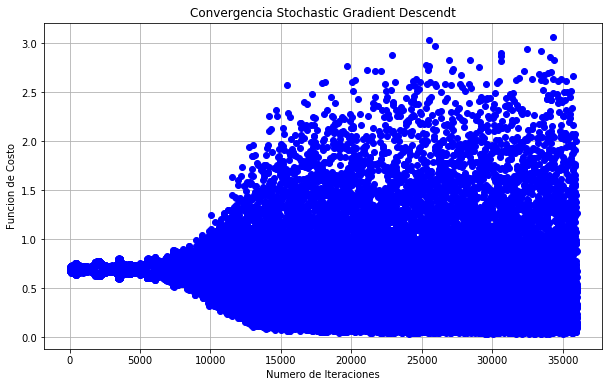

In [48]:
# costos
len(costos)
plotConvergence(costos,len(costos))
length = 500
# plotConvergence(costos[len(costos)-length:len(costos)],length)

In [49]:
predictions = s_predict(parameters, X_test)
accuracy = float((np.dot(y_test,predictions.T) + np.dot(1-y_test,1-predictions.T))/float(y_test.size)*100)
accuracy
# A2, cache = s_forward_propagation(X_test,parameters)
# predictions
# 

76.06

In [50]:
np.mean(predictions == y_test)

0.7606

In [51]:
from sklearn.metrics import accuracy_score
print('Exactitud: ',accuracy_score(y_test, A2))

NameError: name 'A2' is not defined

In [ ]:
plot_decision_boundary(lambda x: s_predict(parameters, x.T), X, Y)

In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    costos,parameters = nn_modelo(X, Y, n_h, num_iterations = 5000, print_cost=False,learning_rate=0.5)
    plot_decision_boundary(lambda x: s_predict(parameters, x.T), X, Y)
    predictions = s_predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))